# Temperature Forecast Project

# Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:
For more information, read [Cho et al, 2020].

1.station - used weather station number: 1 to 25

2.Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3.Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4.Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5.LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6.LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7.LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8.LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9.LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10.LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11.LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12.LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13.LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14.LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15.LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16.LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17.LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18.LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19.lat - Latitude (Â°): 37.456 to 37.645

20.lon - Longitude (Â°): 126.826 to 127.135

21.DEM - Elevation (m): 12.4 to 212.3

22.Slope - Slope (Â°): 0.1 to 5.2

23.Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24.Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25.Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# NOTE: There are two target variables here:

Next_Tmax: Next day maximum temperature

Next_Tmin: Next day minimum temperature

In [1]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import norm

# Algorithms
import reverse_geocoder as rg
import pprint
import scipy
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import scikitplot as skplt

import pickle
import joblib

# Loading the Dataset

In [2]:
df=pd.read_csv('temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

Remarks:  In our dataset,there are a total of 7752 rows and 25 columns present. All the columns are of numerical datatype. We are supposed to predict 2 label columns namely "Next_Tmax" and "Next_Tmin". These target labels contain all numerical data values,so it makes this a Regression problem.

In [3]:
#checking the dimension of the dataset
df.shape

(7752, 25)

# Data Exploration/Analysis

In [4]:
#checking the first 5 entries of the dataset
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
#checking the last 5 entries of the dataset
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [6]:
#checking column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
#checking the datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Remarks: From the above cell, we see that there are 24 numerical data columns and one object data column in our dataset.

In [8]:
#checking for null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Remarks: In the above cell, we can see that there are missing values present in our dataset.

In [9]:
#checking unique values
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

Remarks: Here we can see tha number of unique values each column of our dataset have.

# Statistical Analysis

In [10]:
df.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

Remarks: In the above cell, we see that the count for some of the columns is different which indicates that there are missing values present in those columns.

In [11]:
#empty list to store data
df0=[]
#extracting state and city from latitude and longitude data
def reverseGeocode(coordinates):
  result=rg.search(coordinates)
  return (result)
if __name__=="__main__":
  coordinates=list(zip(df['lat'],df['lon']))
  df1=reverseGeocode(coordinates)
  df0.append(df1)

new_df=pd.DataFrame(df0).transpose()

Loading formatted geocoded file...


Remarks: In the above cell, we have converted all the latitude and longitude data into city and state.

# Feature Engineering:

In [12]:
df['state']=new_df[0].apply(lambda x:x.get('admin1'))
df['City']=new_df[0].apply(lambda x:x.get('name'))
#dropping lat and lon column
df.drop(['lat','lon'],axis=1,inplace=True)

In [13]:
#Converting date into Year, Month, Day
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
#dropping this column since we don't need it anymore
df.drop(['Date'],axis=1,inplace=True)

In [14]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750      NaN          20.0          11.3    19.794666    58.936283   
7751      NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      ...       DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0     ...  212.3350  2.785000      5992.895996       29.1       21.2   
1     ...   44.7624  0.514100      5869.312500       30.5       22.5   
2     ...   33.3068  0.266100      5863.555664       31.1       23.9   
3     ...   45.7160  2.534800      5856.964844       31.7       24.3   
4     ...   35.0380  0.505500      5859.552246       31.2       22.5   
...   ...       ...       ...              ...        ...        ...   
7747  ...   15.5876  0.155400      4443.313965       28.3       18.1   
7748  ...   17.2956  0.222300      4438.373535       28.6       18.8   
7749  ...   19.5844  0.271300      4451.345215       27.8       17.4   
7750  ...   12.3700  0.098475      4329.520508       17.4       11.3   
7751  ...  212.3350  5.178230      5992.895996       38.9       29.8   

            state        City    Year  Month   Day  
0           Seoul       Seoul  2013.0    6.0  30.0  
1           Seoul       Seoul  2013.0    6.0  30.0  
2           Seoul       Seoul  2013.0    6.0  30.0  
3           Seoul       Seoul  2013.0    6.0  30.0  
4     Gyeonggi-do     Guri-si  2013.0    6.0  30.0  
...           ...         ...     ...    ...   ...  
7747  Gyeonggi-do  Kwangmyong  2017.0    8.0  30.0  
7748  Gyeonggi-do  Kwangmyong  2017.0    8.0  30.0  
7749        Seoul       Seoul  2017.0    8.0  30.0  
7750  Gyeonggi-do  Kwangmyong     NaN    NaN   NaN  
7751  Gyeonggi-do     Guri-si     NaN    NaN   NaN  

[7752 rows x 27 columns]

In [15]:
#checking which column have how many unique values so we can plot countplot for them
{column:len(df[column].unique()) for column in df.columns if df[column].dtypes=='float64'}

{'station': 26,
 'Present_Tmax': 168,
 'Present_Tmin': 156,
 'LDAPS_RHmin': 7673,
 'LDAPS_RHmax': 7665,
 'LDAPS_Tmax_lapse': 7676,
 'LDAPS_Tmin_lapse': 7676,
 'LDAPS_WS': 7676,
 'LDAPS_LH': 7676,
 'LDAPS_CC1': 7570,
 'LDAPS_CC2': 7583,
 'LDAPS_CC3': 7600,
 'LDAPS_CC4': 7525,
 'LDAPS_PPT1': 2813,
 'LDAPS_PPT2': 2511,
 'LDAPS_PPT3': 2357,
 'LDAPS_PPT4': 1919,
 'DEM': 25,
 'Slope': 27,
 'Solar radiation': 1575,
 'Next_Tmax': 184,
 'Next_Tmin': 158,
 'Year': 6,
 'Month': 13,
 'Day': 22}

# Exploratory Data Analysis(EDA)

# Univariate Analysis:

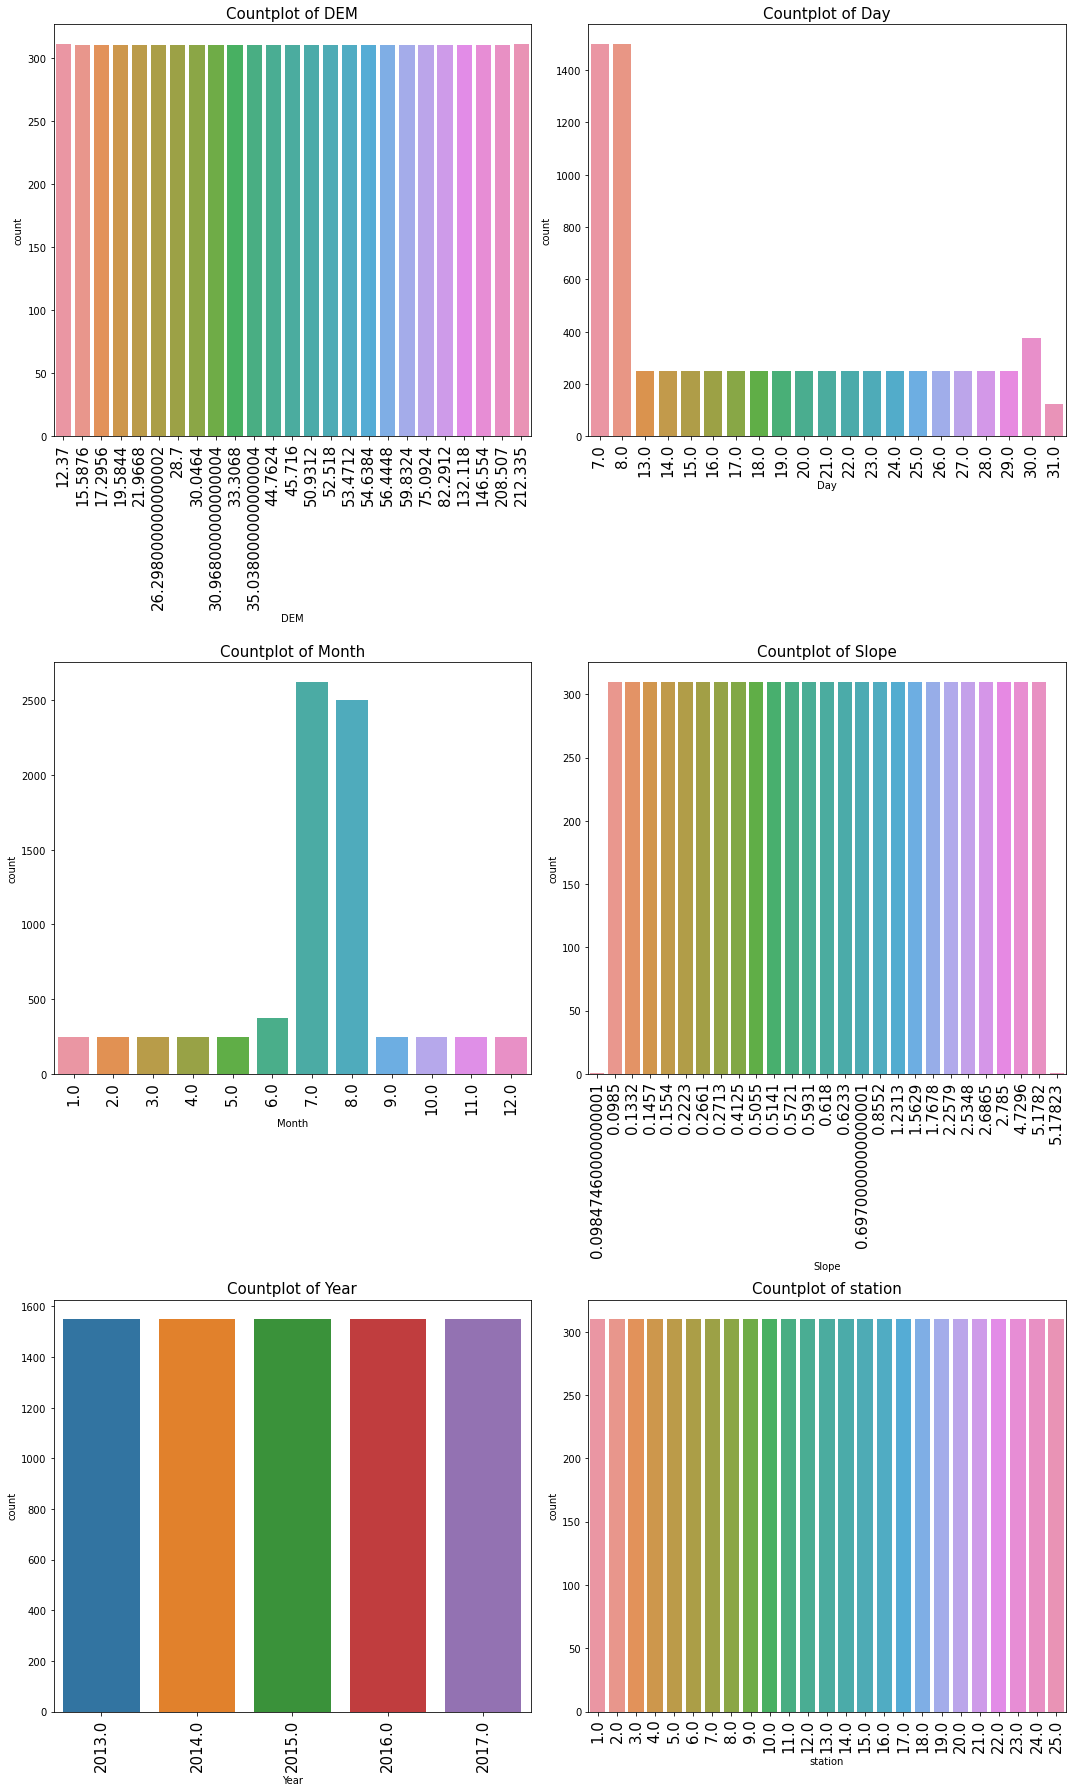

In [33]:
#checking countplots of the feature columns listed in col
col=['DEM','Day','Month','Slope','Year','station']

plt.figure(figsize=(15,25))
for i in range(len(col)):
  plt.subplot(3,2,i+1)
  sns.countplot(df[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=15)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

Observations:

1. From the countplot of Day, we see that day 7th and 8th of every month has high count as compared to other days.

2. From month plot, we see that 7th and 8th month has the highest count as compared to other months.

3. For rest of the feature columns countplots, we see that they have a uniform distribution.

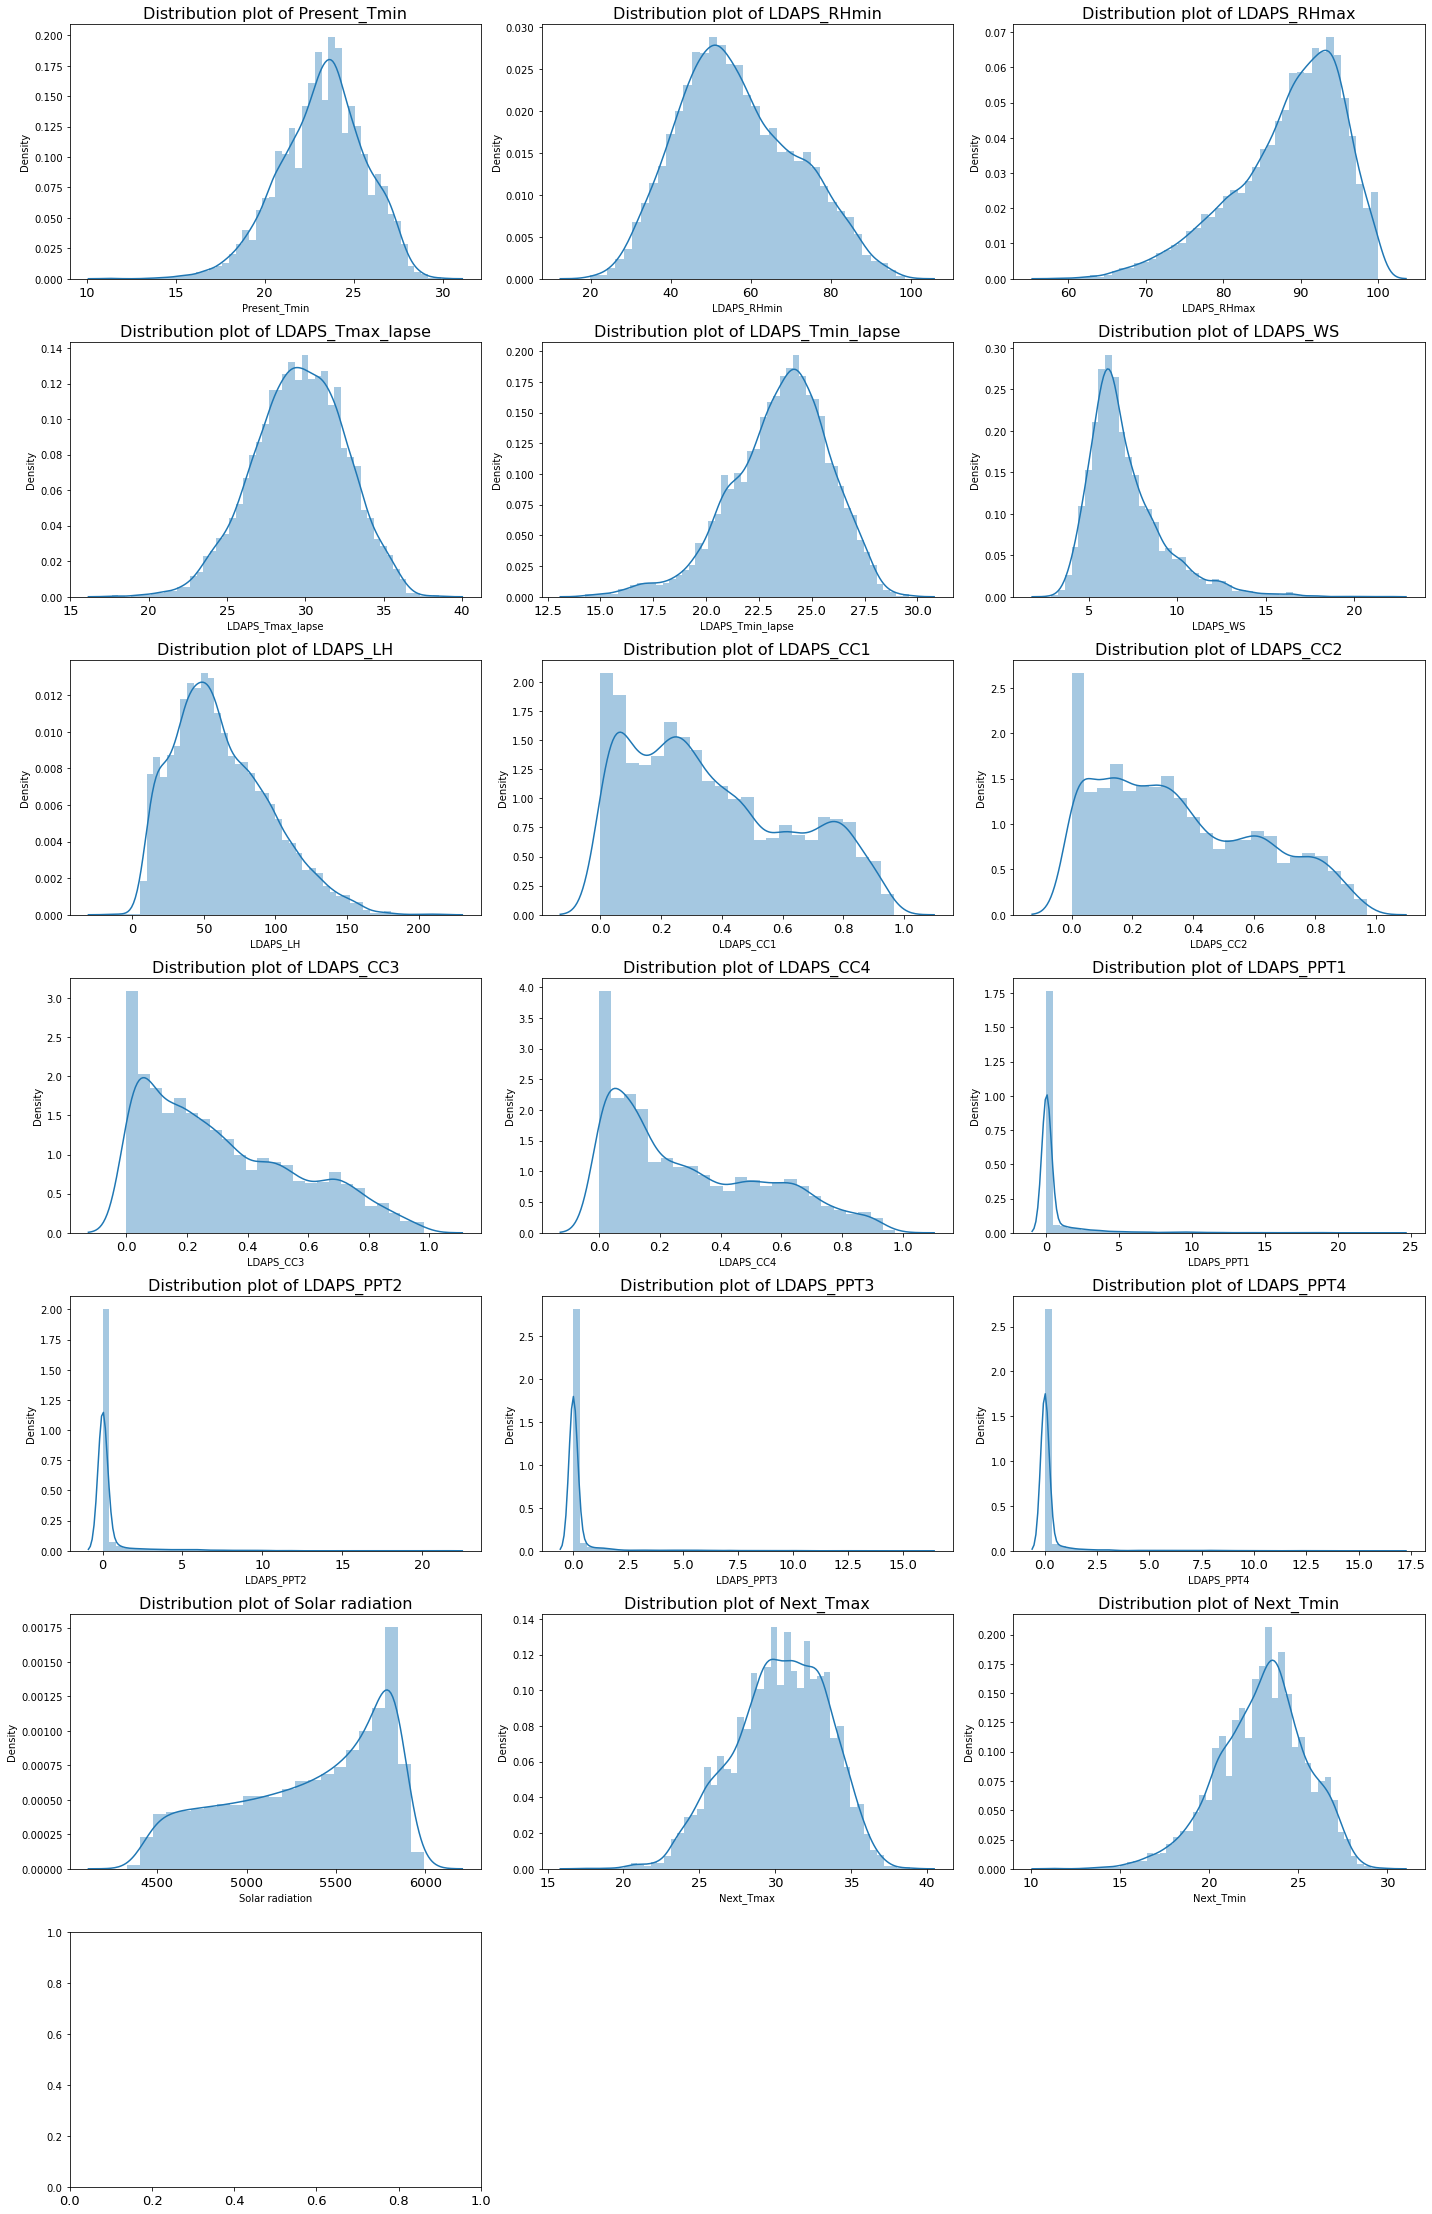

In [34]:
#checking distribution of data of all the feature and target columns
col1=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']

plt.figure(figsize=(20,35))
for i in range(len(col1)):
  sns.distplot(df[col1[i]])
  plt.title(f"Distribution plot of {col1[i]}",fontsize=16)
  plt.subplot(8,3,i+1)
  plt.xticks(fontsize=13)
  plt.tight_layout()

Observation: From the above distribution plots, we can see that the data is not perfectly normally distributed, some of the columns are right skewed and some have left skewed data which means that there is skewness present in our dataset that we will remove later.

Scatter plot for Present_Tmax column with respect to the rows covered:


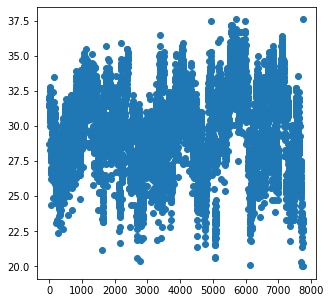

Scatter plot for Present_Tmin column with respect to the rows covered:


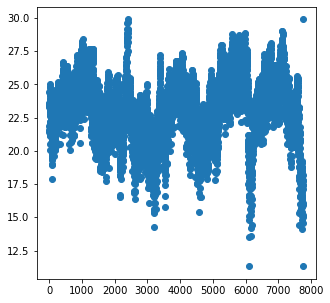

Scatter plot for LDAPS_RHmin column with respect to the rows covered:


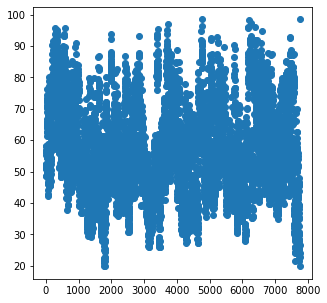

Scatter plot for LDAPS_RHmax column with respect to the rows covered:


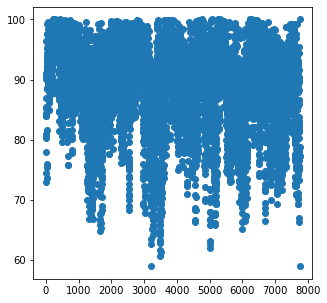

Scatter plot for LDAPS_Tmax_lapse column with respect to the rows covered:


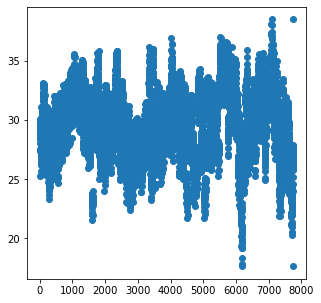

Scatter plot for LDAPS_Tmin_lapse column with respect to the rows covered:


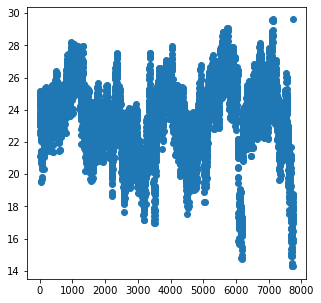

Scatter plot for LDAPS_WS column with respect to the rows covered:


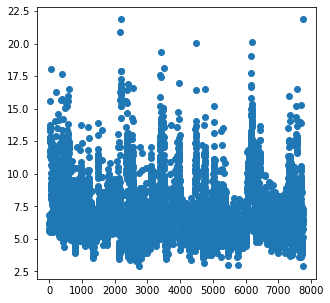

Scatter plot for LDAPS_LH column with respect to the rows covered:


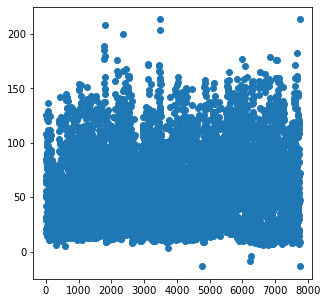

Scatter plot for LDAPS_CC1 column with respect to the rows covered:


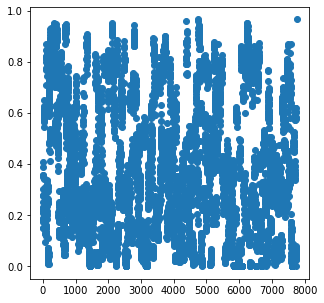

Scatter plot for LDAPS_CC2 column with respect to the rows covered:


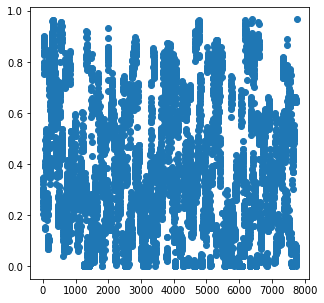

Scatter plot for LDAPS_CC3 column with respect to the rows covered:


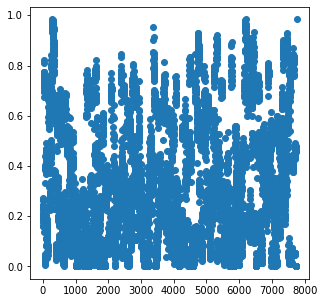

Scatter plot for LDAPS_CC4 column with respect to the rows covered:


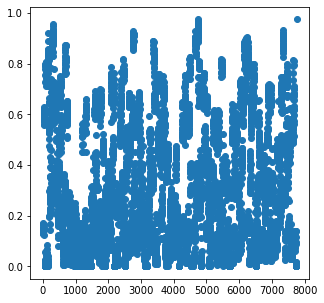

Scatter plot for LDAPS_PPT1 column with respect to the rows covered:


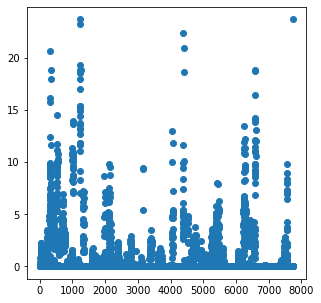

Scatter plot for LDAPS_PPT2 column with respect to the rows covered:


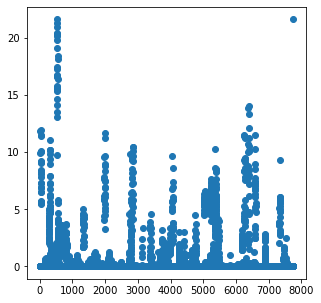

Scatter plot for LDAPS_PPT3 column with respect to the rows covered:


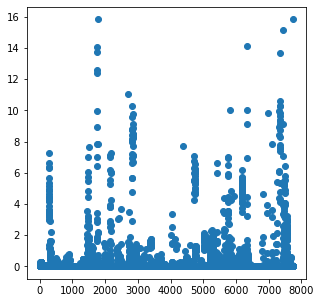

Scatter plot for LDAPS_PPT4 column with respect to the rows covered:


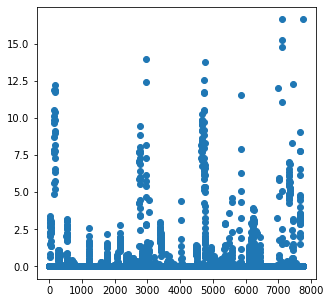

Scatter plot for Solar radiation column with respect to the rows covered:


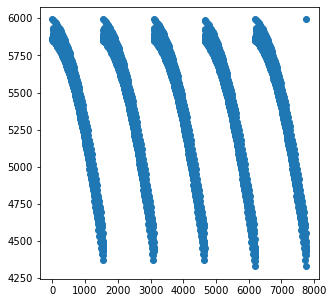

Scatter plot for Next_Tmax column with respect to the rows covered:


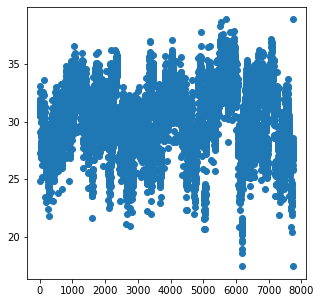

Scatter plot for Next_Tmin column with respect to the rows covered:


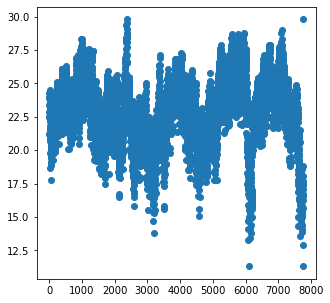

In [37]:
for j in df[col1]:
    plt.figure(figsize=(5,5))
    print(f"Scatter plot for {j} column with respect to the rows covered:" )
    plt.scatter(df.index, df[j])
    plt.show()

Observation: In the above cell, we have generated scatter plots for each and every numeric value column having more than 30 unique values showing the dispersion of datapoints where y-axis contains the column details and x-axis has the index of all the rows corresponding to where those information are present.

# Bivariate Analysis:

In [38]:
#splitting the data into groups
df2=df.groupby('City')[['Next_Tmax','Next_Tmin']].max()
df2=df2.reset_index()
df2=df2.sort_values(by=('Next_Tmax'),ascending=False)
df3=df.groupby('City')[['Next_Tmax','Next_Tmin']].max()
df3=df3.reset_index()
df3=df3.sort_values(by=('Next_Tmin'),ascending=True)

Text(0.5, 1.0, 'City wise minimum temperature')

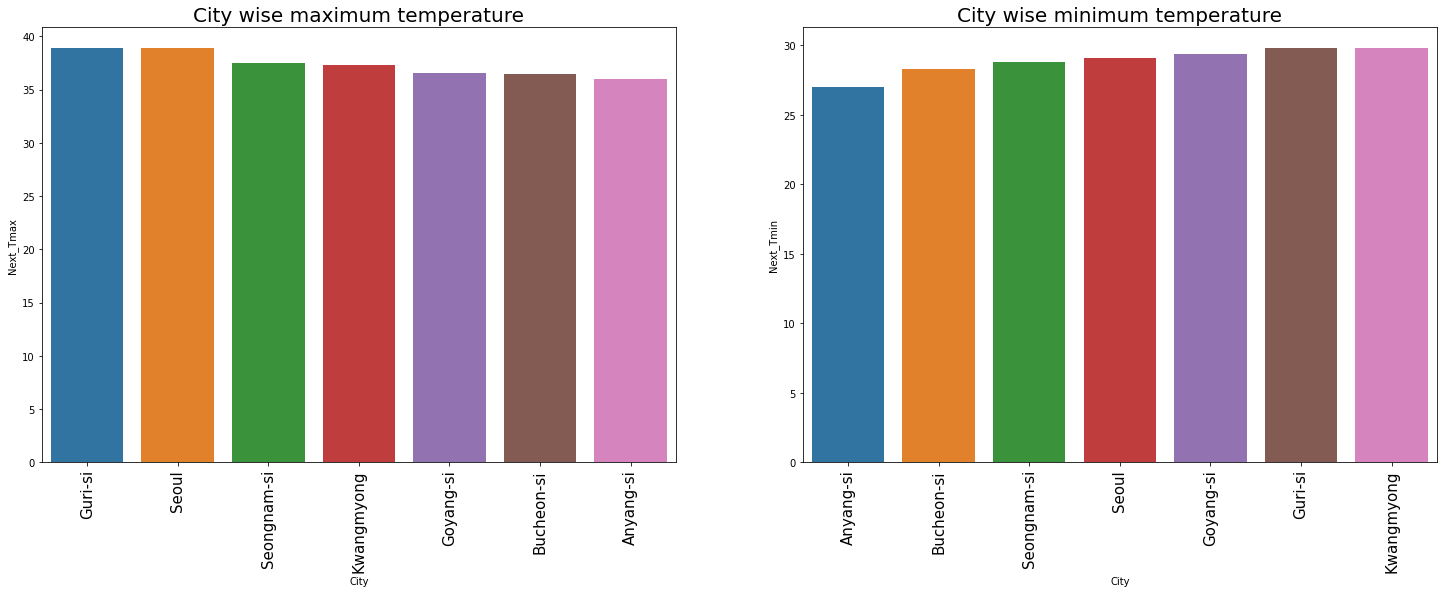

In [39]:
#checking the Target columns w.r.t cities using barplot
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.barplot(x=df2['City'],y=df2['Next_Tmax'])
plt.xticks(rotation=90,fontsize=15)
plt.title("City wise maximum temperature",fontsize=20)
plt.subplot(1,2,2)
sns.barplot(x=df3['City'],y=df3['Next_Tmin'])
plt.xticks(rotation=90,fontsize=15)
plt.title("City wise minimum temperature",fontsize=20)

Observation: From the above plots, we can see the city wise Next day min and max air temperature in which Guri-si and seoul has the highest Next_Tmax, and Anyang-si and Bucheon-si has the lowest Next_Tmin.

In [41]:
#splitting data into groups
df4=df.groupby('state')[['Next_Tmax','Next_Tmin']].max()
df4=df4.reset_index()
df5=df.groupby('state')[['Next_Tmax','Next_Tmin']].min()
df5=df5.reset_index()

Text(0.5, 1.0, 'state wise minimum temperature')

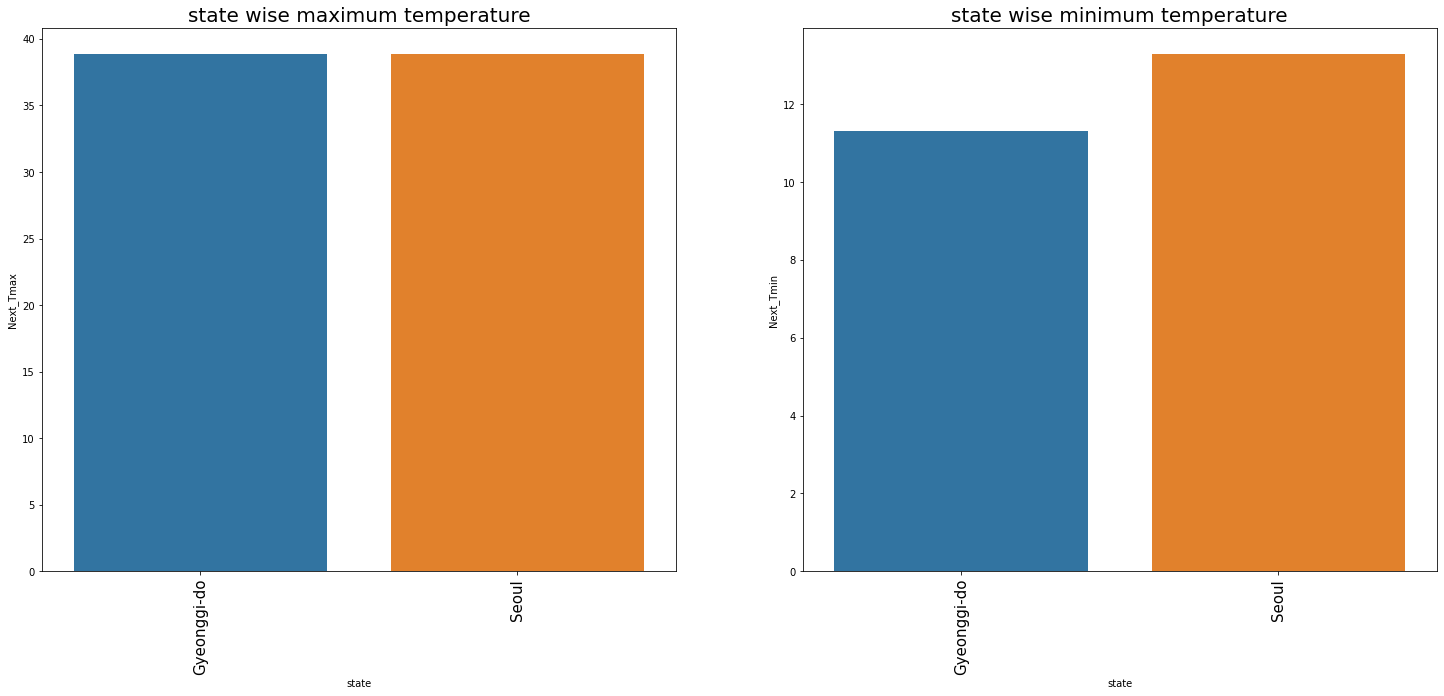

In [42]:
#checking state wise min and max temperature using barplot
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.barplot(x=df4['state'],y=df4['Next_Tmax'])
plt.xticks(rotation=90,fontsize=15)
plt.title("state wise maximum temperature",fontsize=20)
plt.subplot(1,2,2)
sns.barplot(x=df5['state'],y=df5['Next_Tmin'])
plt.xticks(rotation=90,fontsize=15)
plt.title("state wise minimum temperature",fontsize=20)

Observations:

1. From the above barplot, we see that Next day maximun temperature for both state is same which is approxn 38.9.

2. And the next day minimum temperature for seoul is higher than Gyeonggi-do.

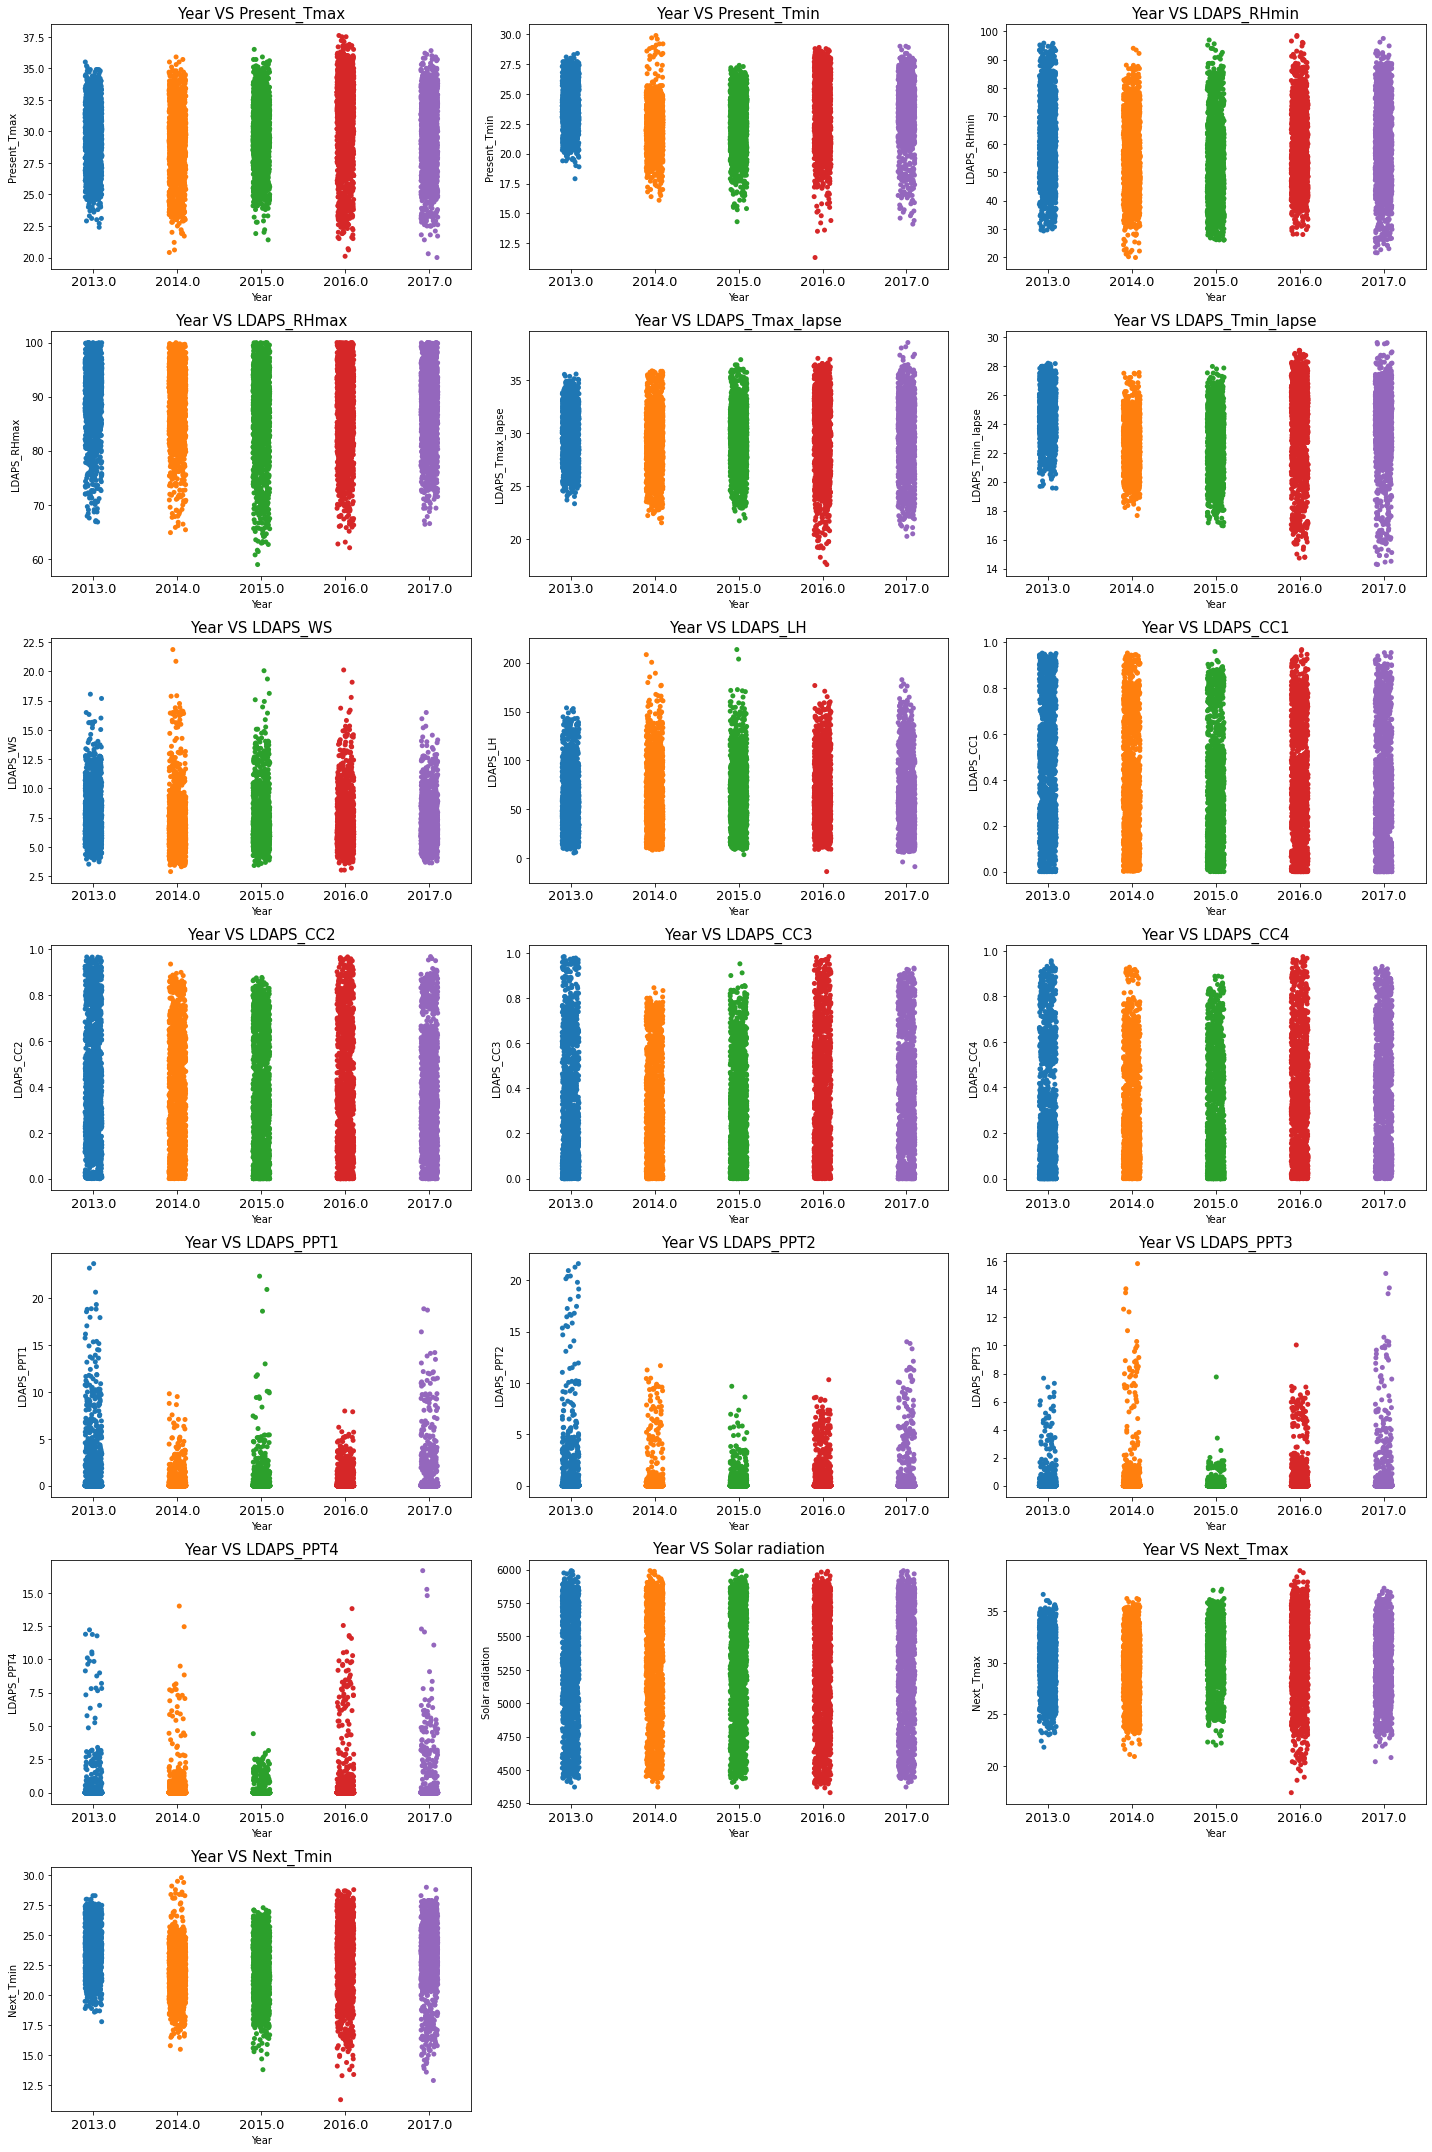

In [43]:
#checking how the feature columns relates with Year using stripplot
plt.figure(figsize=(20,30))
for i in range(len(col1)):
  plt.subplot(7,3,i+1)
  sns.stripplot(x=df['Year'],y=df[col1[i]])
  plt.title(f"Year VS {col1[i]}",fontsize=15)
  plt.xticks(fontsize=13)
  plt.tight_layout()

Observations:

1.From Year vs present_Tmax plot, we see that the year 2016 has the highest temperature value.

2.From year vs present_Tmin plot, we can see that the year 2016 and 2017 has the minumum temperature value ranging between 11.3 to 29.9°C.

3.From year vs LDAPS model forecast of next-day minimum relative humidity (%): ranging from 19.8 to 98.5, the year 2014 and 2017 has the minimum humidity.

4.From Year vs LDAPS model forecast of next-day maximum relative humidity (%): ranging from 58.9 to 100, all years has same count.

5.From Year vs LDAPS model forecast of next-day maximum air temperature applied lapse rate (°C): ranging from 17.6 to 38.5, we can say 2016 and 2017 has the highest lapse rate.

6.From year vs LDAPS model forecast of next-day minimum air temperature applied lapse rate (°C): ranging from 14.3 to 29.6, we can say minimum air temperature was in 2016 and 2017.

7.From year vs LDAPS model forecast of next-day average wind speed (m/s): ranging from 2.9 to 21.9; and LDAPS model forecast of next-day average latent heat flux (W/m2):ranging from -13.6 to 213.4 has the highest value in 2014 and 2015.

8.From Year vs LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%):  ranging from 0 to 0.97, we can say maximum value was on 2013 and 2014.

9.From year vs LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): ranging from 0 to 0.97, the maximum value was on 2013 and 2016.

10.From year vs LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): ranging from 0 to 0.98, the maximum value was in 2013 and 2016.

11.From year vs LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): ranging from 0 to 0.97, the maximum value was on 2013 and 2016.

12.From year vs LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): ranging from 0 to 23.7, we see that 2013 and 2017 has the highest value.

13.From year vs LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): ranging from 0 to 21.6, we see that 2013 and 2017 has the highest values.

14.From year vs LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): ranging from 0 to 15.8, we see that 2014 and 2017 has the highest count

15.From year vs LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): ranging from 0 to 16.7, we can say 2016 and 2017 has the highest count.

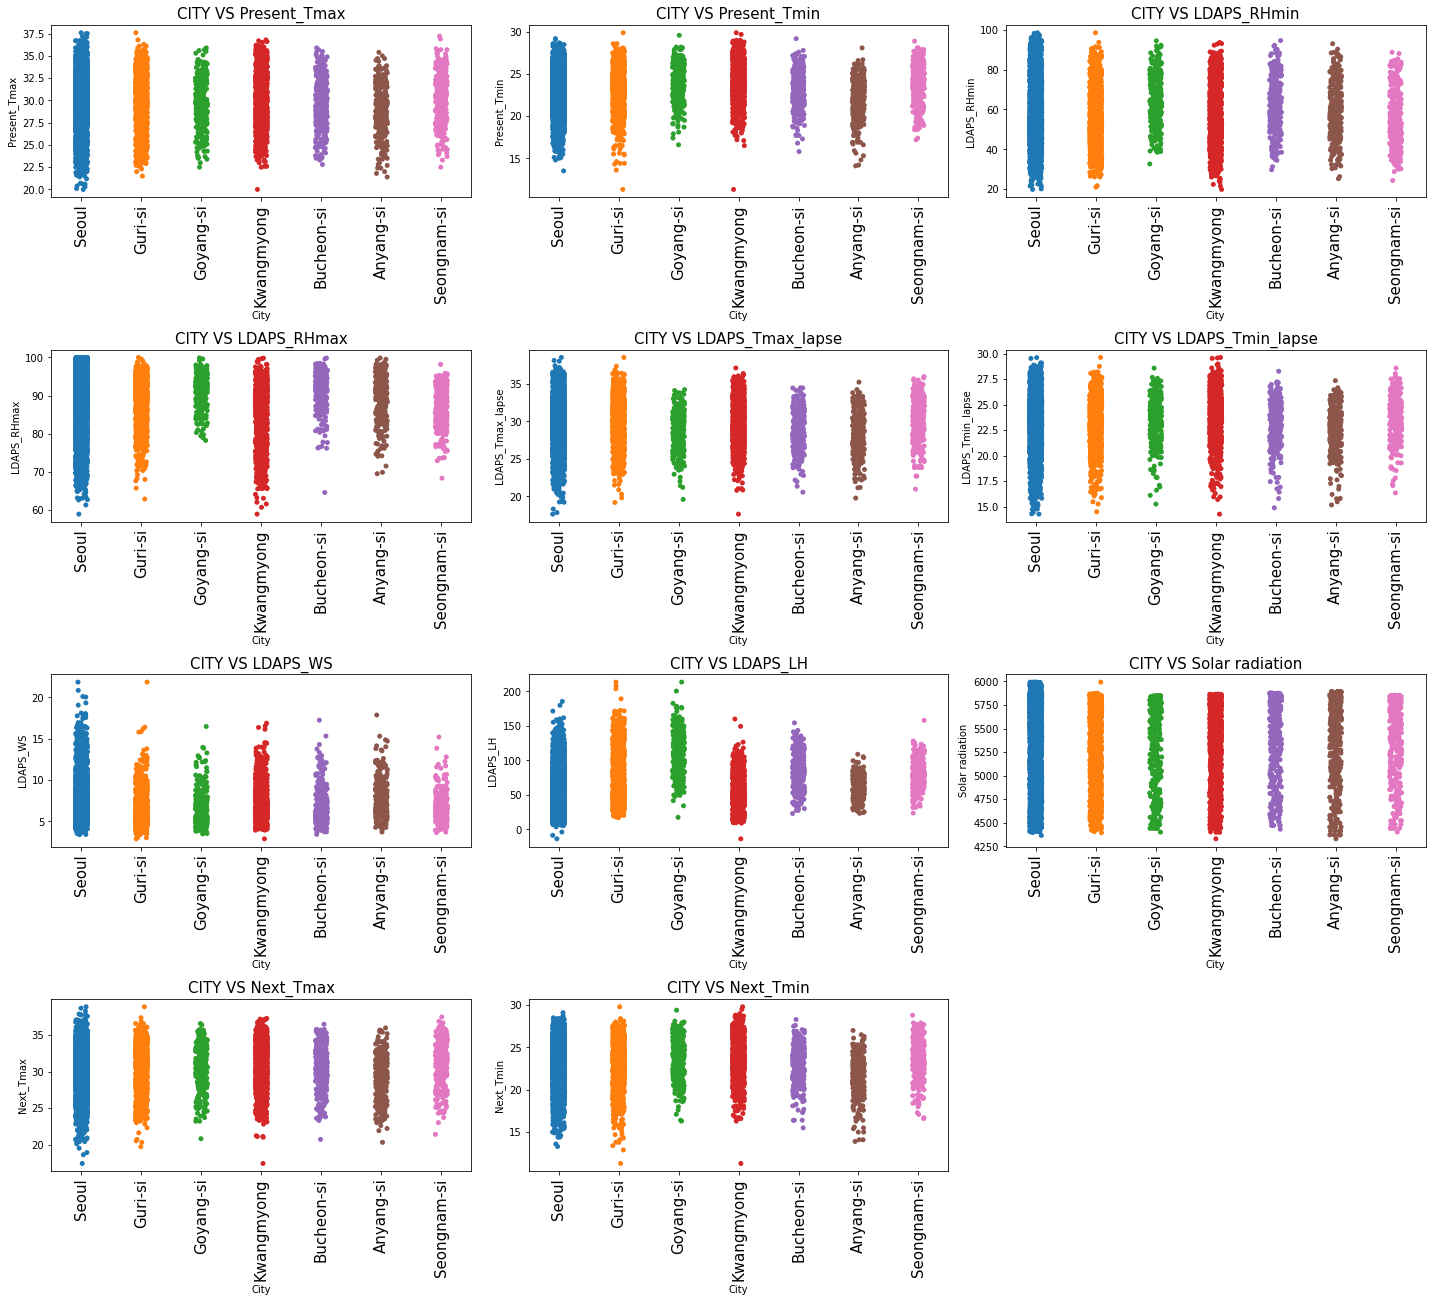

In [44]:
#checking how the feature columns varies with city using stripplot
col2=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']

plt.figure(figsize=(20,30))
for i in range(len(col2)):
  plt.subplot(7,3,i+1)
  sns.stripplot(x=df['City'],y=df[col2[i]])
  plt.title(f"CITY VS {col2[i]}",fontsize=15)
  plt.xticks(fontsize=15,rotation=90)
  plt.tight_layout()

Observation:

1.From City vs present_Tmax plot, we see that seoul has the highest temperature.

2.From City vs present_tmin plot, we see that Seoul and Guri-si has the minimum temperature.

3.From City vs LDAPS model forecast of next-day minimum and maximum relative humidity, we can say Seoul and Kwangmtong has the minimum temperature as well as maximum temperature.

4.From city vs LDAPS model forecast of next-day maximum air temperature applied lapse rate plot, we can say that seoul and Guri-si has the minimum and maximum values.

5.From city vs LDAPS model forecast of next-day average wind speed plot, we can say Seoul has the maximum value.

6.From city vs LDAPS model forecast of next-day average latent heat flux, we can say that Guri-si and Seoul has the highest values.

7.From City vs solar radiation plot, we can see that Seoul has the highest rate.

8.From City vs Next_Tmax plot, we see that Guri-si and Seoul has the highest temperature as compared to other cities.

9.From City vs Next_Tmin plot,we can see that Seoul and Guri-si has the the highestv number of values for Next day minimum temperature.

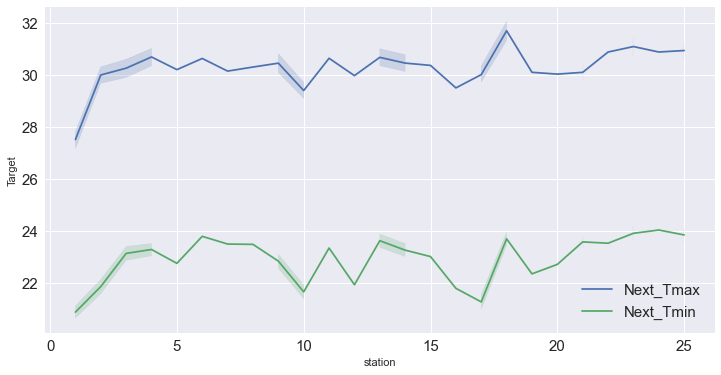

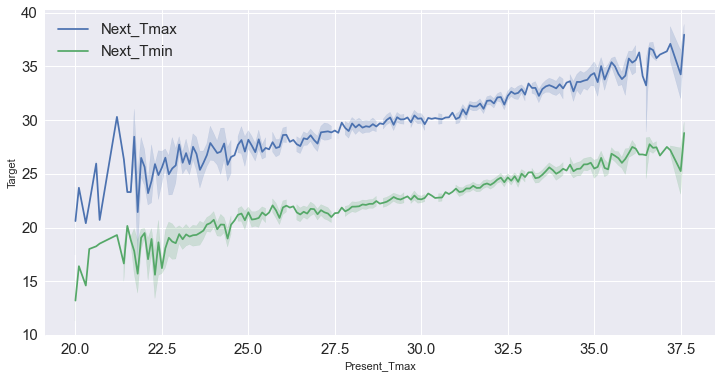

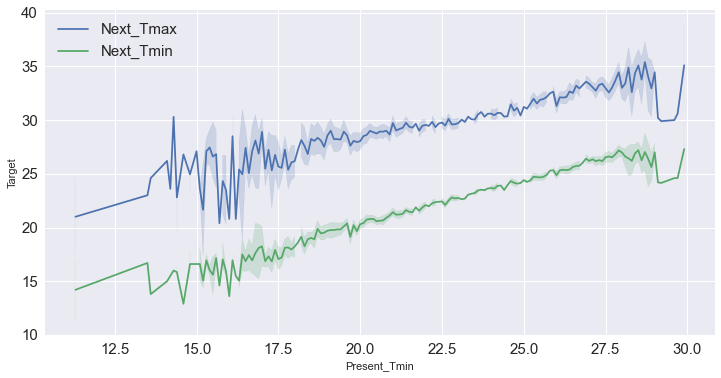

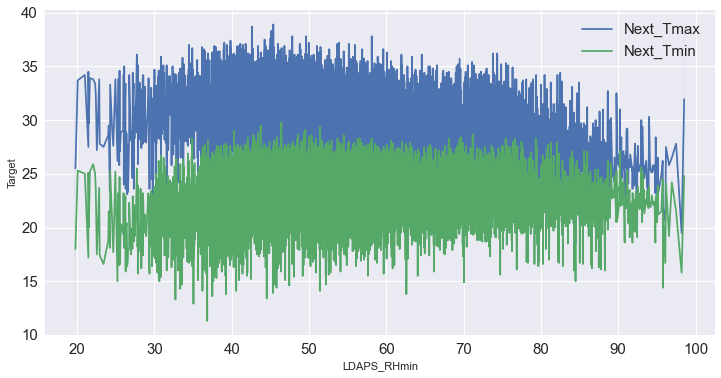

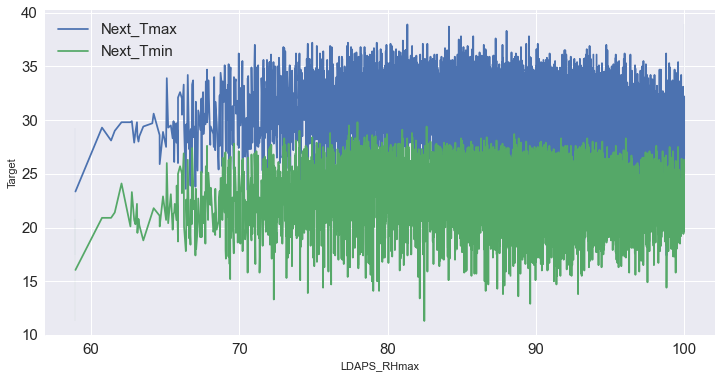

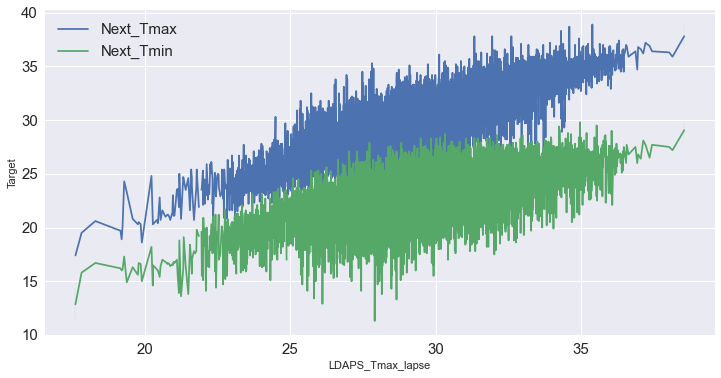

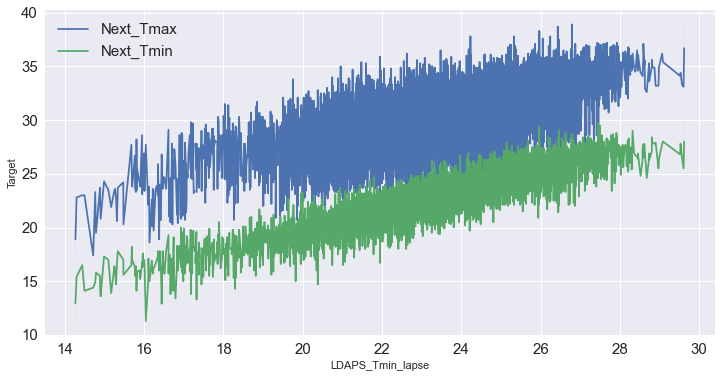

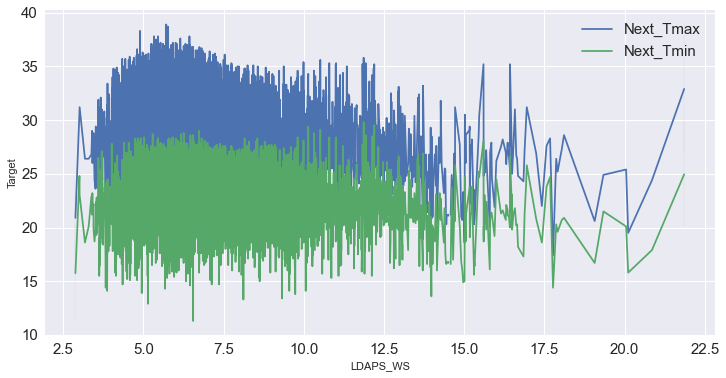

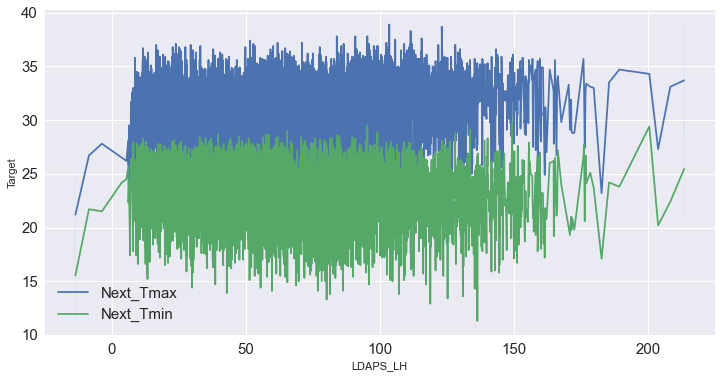

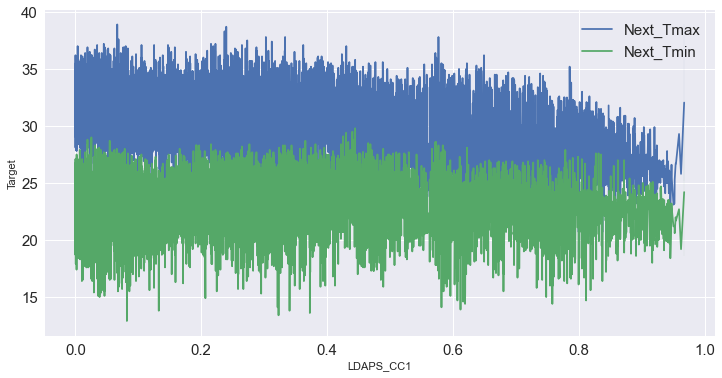

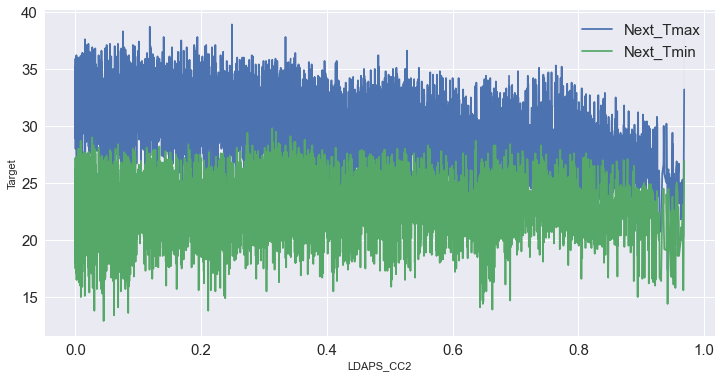

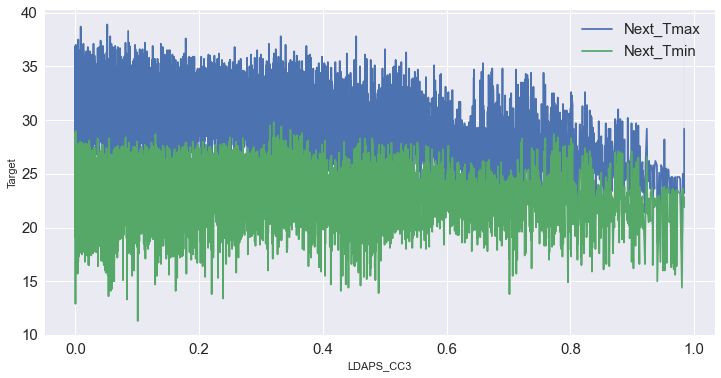

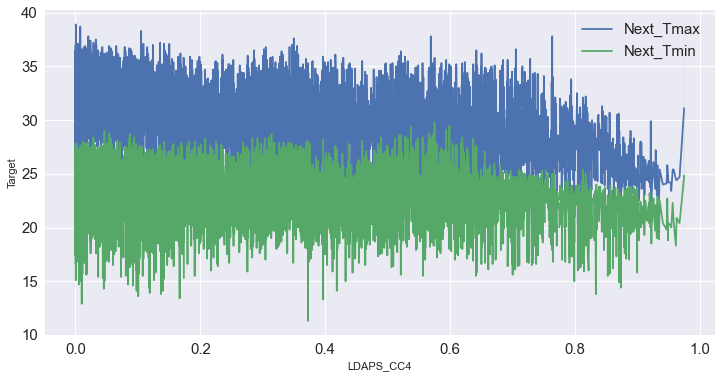

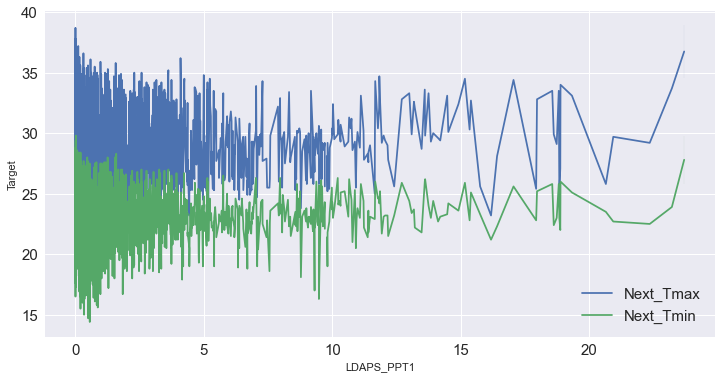

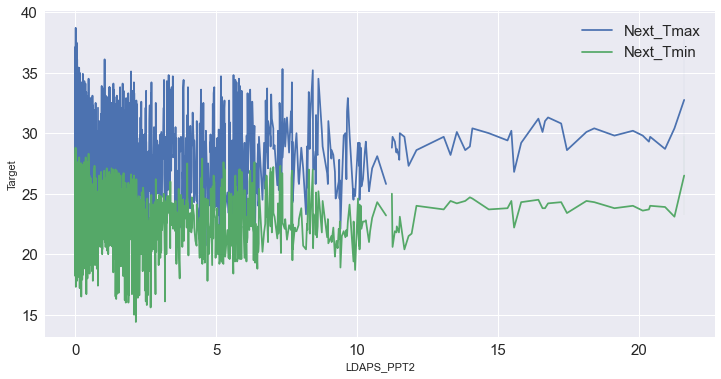

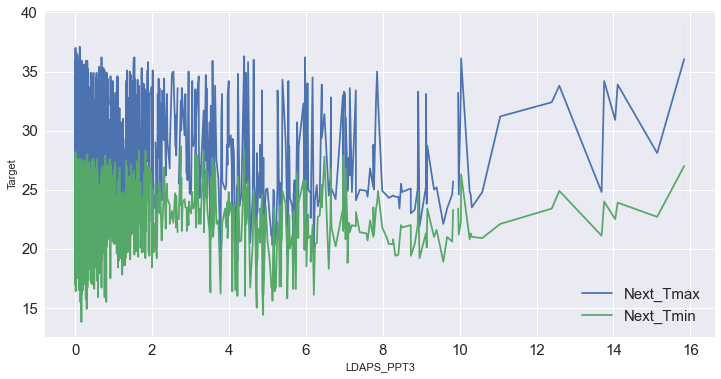

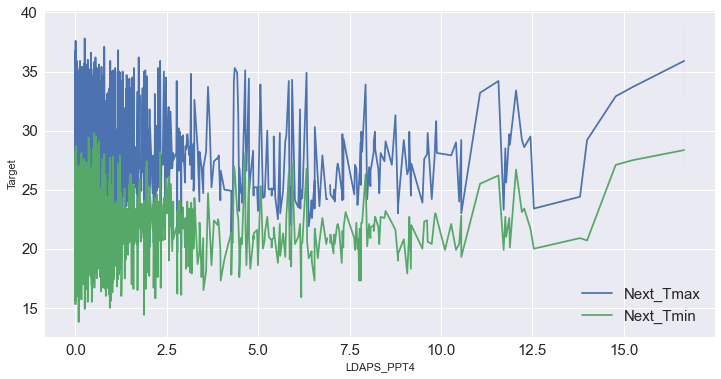

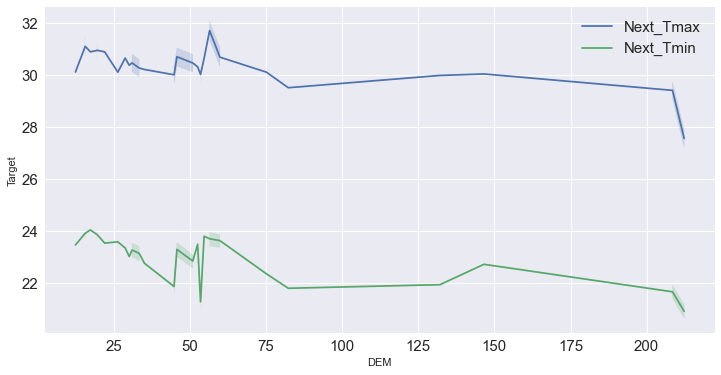

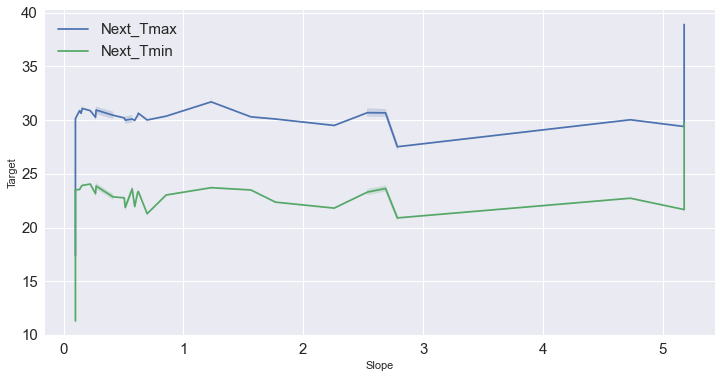

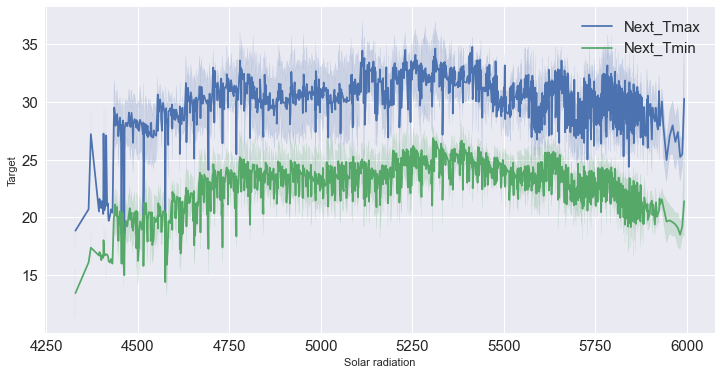

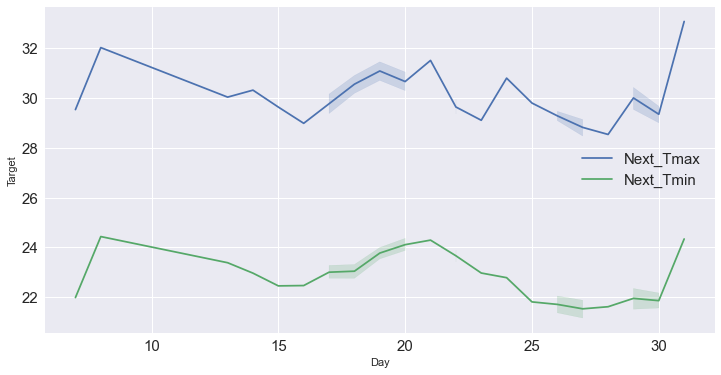

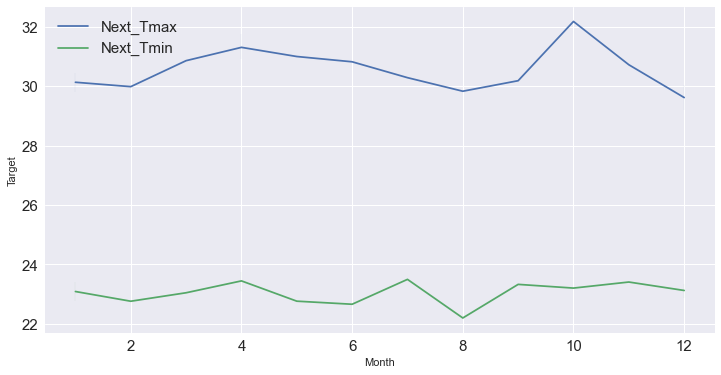

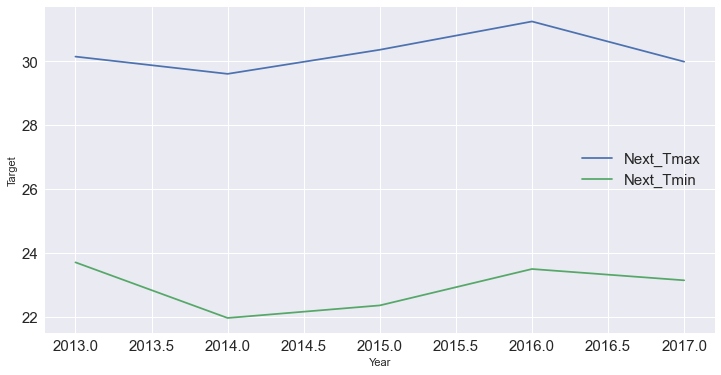

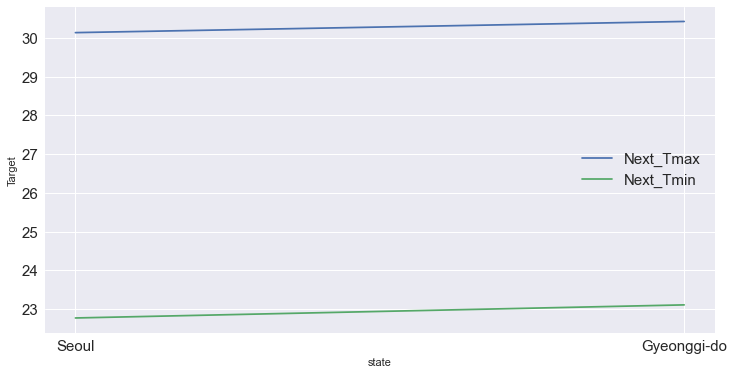

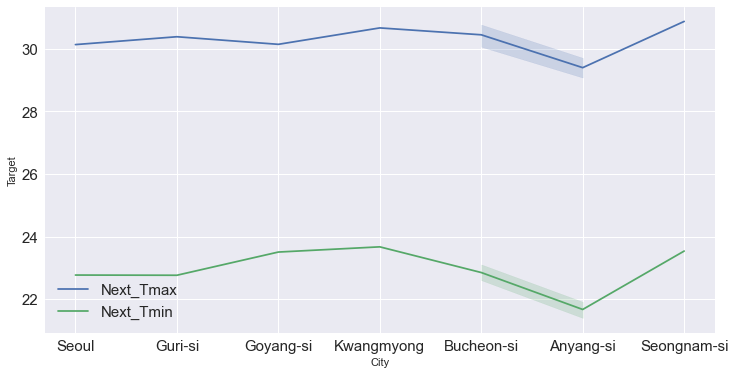

In [47]:
#checking lineplot for the target vs feature columns
feature_columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
                   'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Day', 
                   'Month', 'Year', 'state', 'City']

target_columns = ['Next_Tmax', 'Next_Tmin']

plt.style.use('seaborn')
for z in df[feature_columns]:
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df[z], y=target_columns[0], data=df)
    sns.lineplot(x=df[z], y=target_columns[1], data=df)
    plt.ylabel("Target")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(['Next_Tmax', 'Next_Tmin'], fontsize=15)
    plt.show()

Remarks: With the help of above line plots, we are able to see the data distribution between our feature columns with respect to our target columns.

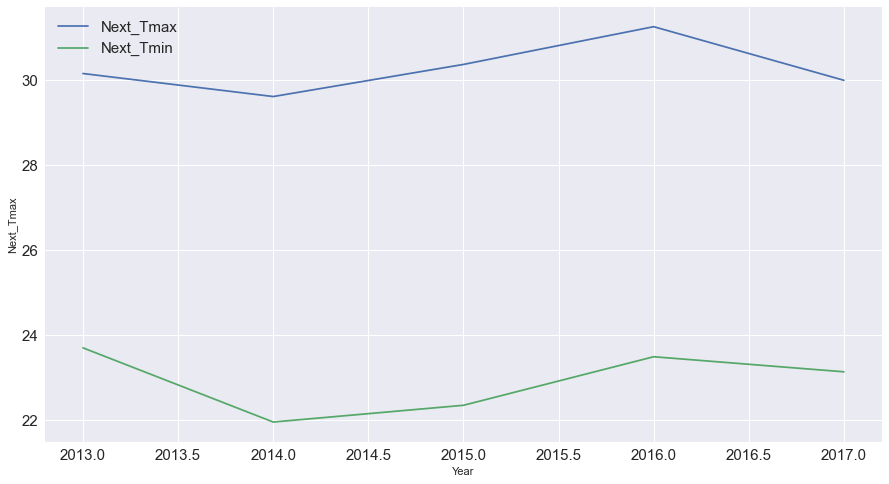

In [48]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Next_Tmax',data=df)
sns.lineplot(x='Year',y='Next_Tmin',data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Next_Tmax','Next_Tmin'],fontsize=15)
plt.show()

Observation: 

From the above plot, we see that Maximum next day temperature was high in 2016 and next day temperature was minimum in 2014.

We can see that Temperature is not constant, it is falling and then increasing with time.

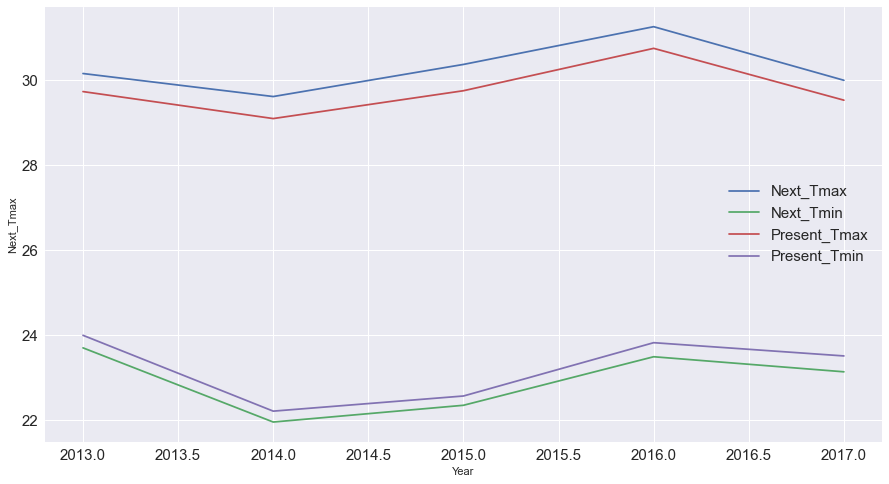

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Next_Tmax',data=df)
sns.lineplot(x='Year',y='Next_Tmin',data=df)
sns.lineplot(y='Present_Tmax',x='Year',data=df)
sns.lineplot(y='Present_Tmin',x='Year',data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Next_Tmax','Next_Tmin','Present_Tmax','Present_Tmin'],fontsize=15)
plt.show()


Observation: From the above plot, we see that Next_Tmax was in 2016 and Next_Tmin was in 2014; and temperature is not constant with time, it is falling and then gradually rising because in real time temperature is always increasing and our data here is showing that too.

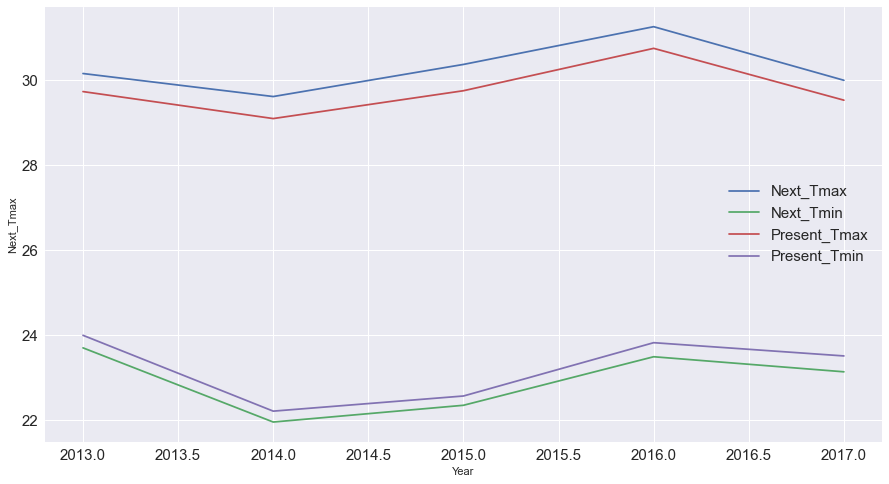

In [50]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Next_Tmax',data=df)
sns.lineplot(x='Year',y='Next_Tmin',data=df)
sns.lineplot(y='Present_Tmax',x='Year',data=df)
sns.lineplot(y='Present_Tmin',x='Year',data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Next_Tmax','Next_Tmin','Present_Tmax','Present_Tmin'],fontsize=15)
plt.show()

Observations:

1. From Present_Tmax vs Next_Tmax, we see that temperature on next day is high as compared to present day.

2. From Present_Tmin vs Next_Tmin, we can see that temperature on next day is minimum as compared to present day.

In [51]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

        DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin        state  \
0  212.3350  2.7850      5992.895996       29.1       21.2        Seoul   
1   44.7624  0.5141      5869.312500       30.5       22.5        Seoul   
2   33.3068  0.2661      5863.555664       31.1       23.9        Seoul   
3   45.7160  2.5348      5856.964844       31.7       24.3        Seoul   
4   35.0380  0.5055      5859.552246       31.2       22.5  Gyeonggi-do   

      City    Year  Month   Day  
0    Seoul  2013.0    6.0  30.0  
1    Seoul  2013.0    6.0  30.0  
2    Seoul  2013.0    6.0  30.0  
3    Seoul  2013.0    6.0  30.0  
4  Guri-si  2013.0    6.0  30.0  

[5 rows x 27 columns]

In [52]:
df.isna().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
state                0
City                 0
Year                 2
Month                2
Day                  2
dtype: int64

Remarks: There are missing values in our dataset which we will be filling with mean and mode later.

# Encoding the categorical data:

In [53]:
# using ordinal encoder because every column is having values in order
oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df=df.copy()
  df[column]=oe.fit_transform(df[column])
  return df

In [54]:
df=ordinal_encoder(df,['City','state'])

# Data Pre-processing:

In [55]:
def preprocess(df):
  df=df.copy()
  for column in ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']:
    df[column]=df[column].fillna(df[column].mean())
  for column in ['Year','Month','Day','station']:
    df[column]=df[column].fillna(df[column].mode()[0])
#Splitting data into independent and dependent variable:
  X=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
  y=df[['Next_Tmax','Next_Tmin']]
  return X,y

Remarks: In the above cell, we have filled the null values of continuous data with mean; and for categorical data we filled it by mode. Then we splitted the data into independent and dependent variable.

In [56]:
X,y=preprocess(df)

In [57]:
x=X

# Multivariate Analysis:

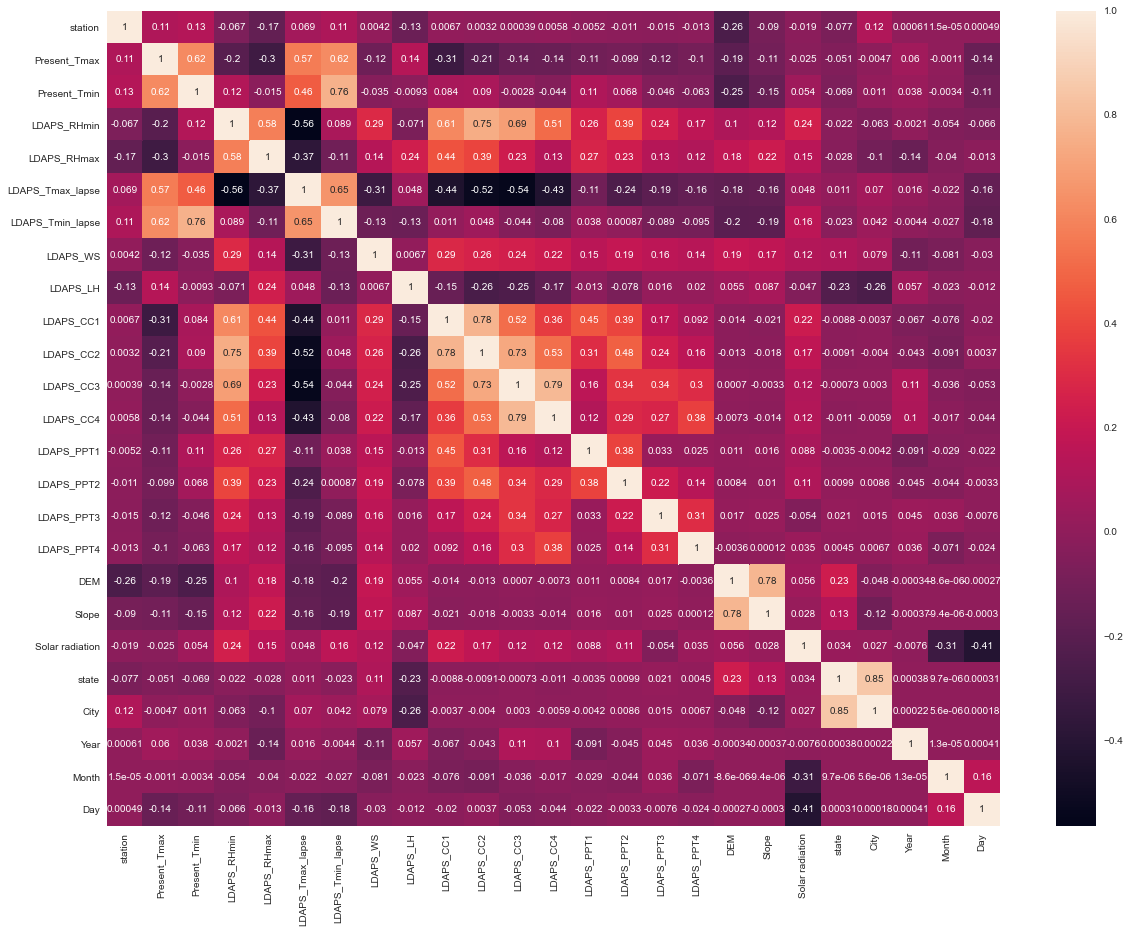

In [59]:
#Checking Correlation
X_corr=X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(X_corr,annot=True)
plt.show()

Remarks: From the above heatmap, we see that many columns have good correlation and there are few columns which are multicollinear but we won't drop them as they add weightage over our model prediction.

# Checking Outliers:

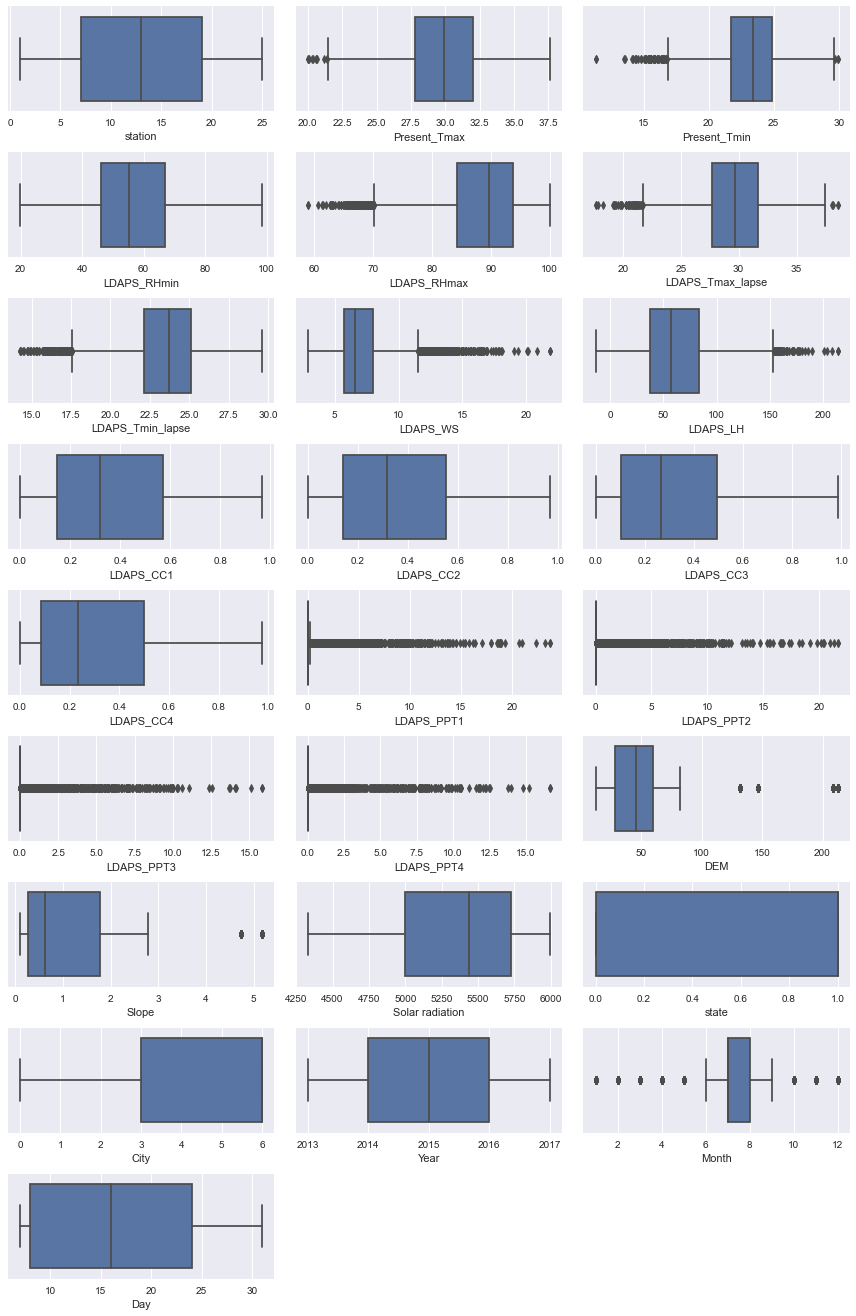

In [60]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Observation: From the above boxplots, we see that there are outliers present in our dataset.

In [61]:
#removing outliers using percentile method
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

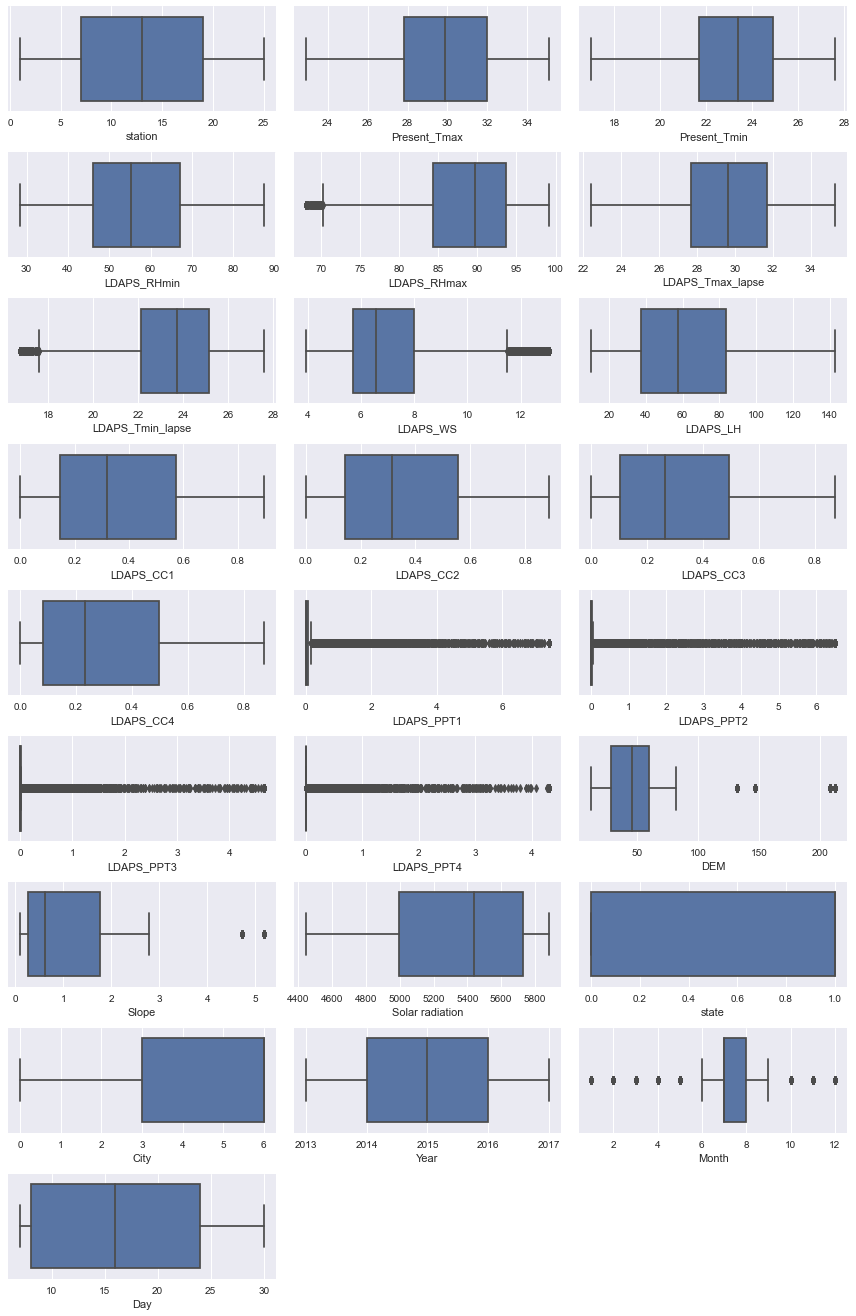

In [62]:
#checking outliers after removal
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: Many outliers have been removed

# Checking skewness:

In [63]:
X.skew()

station             0.000100
Present_Tmax       -0.273084
Present_Tmin       -0.303162
LDAPS_RHmin         0.267646
LDAPS_RHmax        -0.800134
LDAPS_Tmax_lapse   -0.189852
LDAPS_Tmin_lapse   -0.550108
LDAPS_WS            1.114297
LDAPS_LH            0.546838
LDAPS_CC1           0.444996
LDAPS_CC2           0.451103
LDAPS_CC3           0.604213
LDAPS_CC4           0.643015
LDAPS_PPT1          3.534597
LDAPS_PPT2          3.719570
LDAPS_PPT3          4.524134
LDAPS_PPT4          4.543390
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.515178
state              -0.079542
City               -0.967212
Year                0.000365
Month              -0.705303
Day                 0.236834
dtype: float64

Remarks: We see that our data has skewness.

In [65]:
df_skew=pd.DataFrame(X.select_dtypes(np.number).columns,columns=['Feature'])
df_skew['Skew']=df_skew['Feature'].apply(lambda feature:scipy.stats.skew(X[feature]))
df_skew['Absolute_skew']=df_skew['Skew'].apply(abs)
df_skew['Skewed']=df_skew['Absolute_skew'].apply(lambda x:True if x>=0.5 else False)
df_skew

Feature      Skew  Absolute_skew  Skewed
0            station  0.000100       0.000100   False
1       Present_Tmax -0.273031       0.273031   False
2       Present_Tmin -0.303104       0.303104   False
3        LDAPS_RHmin  0.267594       0.267594   False
4        LDAPS_RHmax -0.799980       0.799980    True
5   LDAPS_Tmax_lapse -0.189815       0.189815   False
6   LDAPS_Tmin_lapse -0.550002       0.550002    True
7           LDAPS_WS  1.114082       1.114082    True
8           LDAPS_LH  0.546733       0.546733    True
9          LDAPS_CC1  0.444910       0.444910   False
10         LDAPS_CC2  0.451015       0.451015   False
11         LDAPS_CC3  0.604096       0.604096    True
12         LDAPS_CC4  0.642890       0.642890    True
13        LDAPS_PPT1  3.533913       3.533913    True
14        LDAPS_PPT2  3.718850       3.718850    True
15        LDAPS_PPT3  4.523259       4.523259    True
16        LDAPS_PPT4  4.542511       4.542511    True
17               DEM  1.722924       1.722924    True
18             Slope  1.562718       1.562718    True
19   Solar radiation -0.515078       0.515078    True
20             state -0.079526       0.079526   False
21              City -0.967024       0.967024    True
22              Year  0.000365       0.000365   False
23             Month -0.705167       0.705167    True
24               Day  0.236788       0.236788   False

# Removing skewness:

In [66]:
#using power transform to remove skewness
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [67]:
#checking data after skewness removal
X_new.skew()

station            -0.204739
Present_Tmax       -0.049570
Present_Tmin       -0.032870
LDAPS_RHmin        -0.022682
LDAPS_RHmax        -0.121049
LDAPS_Tmax_lapse   -0.026554
LDAPS_Tmin_lapse   -0.041812
LDAPS_WS            0.025665
LDAPS_LH           -0.059849
LDAPS_CC1           0.045410
LDAPS_CC2           0.043534
LDAPS_CC3           0.085732
LDAPS_CC4           0.125332
LDAPS_PPT1          1.392717
LDAPS_PPT2          1.562398
LDAPS_PPT3          1.723208
LDAPS_PPT4          1.934279
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.182605
state              -0.079542
City               -0.507085
Year               -0.000108
Month               0.043843
Day                -0.043510
dtype: float64

Remarks: From the above cell, we can see that we were able to remove some skewed data.

# Feature Scaling:

In [68]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

# Splitting data for model building using train test split:

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

# Training the models:

In [70]:
models={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso()  
}

# Finding the best model:

************************************************ ExtraTreesRegressor *****************************************************
MEAN SQUARED ERROR 0.6456779223786855


MEAN ABSOLUTE ERROR 0.5906774077475117


CVS_SCORE 0.9206191831990844


R2_SCORE 0.9178411545211953


RMSE 0.8035408654067854


MODEL PERFORMANCE CURVE


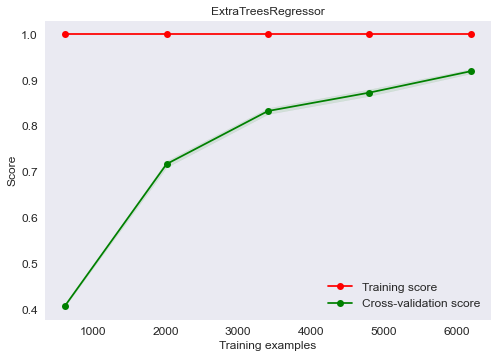

************************************************ RandomForestRegressor *****************************************************
MEAN SQUARED ERROR 0.8072638633625322


MEAN ABSOLUTE ERROR 0.6743568734469221


CVS_SCORE 0.899376783773611


R2_SCORE 0.8982057295863687


RMSE 0.8984786382338381


MODEL PERFORMANCE CURVE


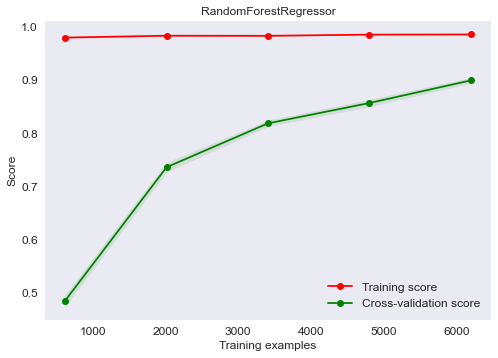

************************************************ LinearRegression *****************************************************
MEAN SQUARED ERROR 1.7268974828528507


MEAN ABSOLUTE ERROR 0.9844955025585922


CVS_SCORE 0.7877983719312702


R2_SCORE 0.7910746411553127


RMSE 1.314114714495219


MODEL PERFORMANCE CURVE


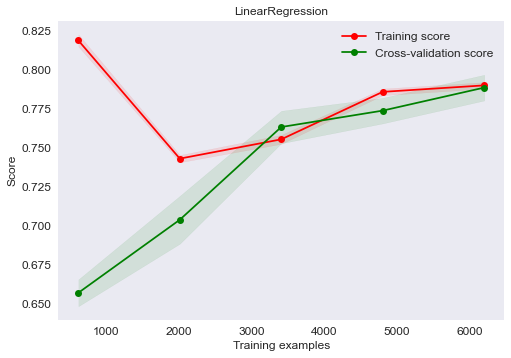

************************************************ DecisionTreeRegressor *****************************************************
MEAN SQUARED ERROR 1.8383143646861342


MEAN ABSOLUTE ERROR 0.973476835658253


CVS_SCORE 0.7628784402849816


R2_SCORE 0.769374605496437


RMSE 1.3558445208378924


MODEL PERFORMANCE CURVE


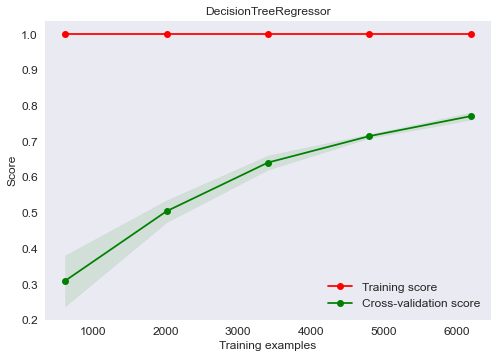

************************************************ Lasso *****************************************************
MEAN SQUARED ERROR 3.2687984690506924


MEAN ABSOLUTE ERROR 1.3999011729632955


CVS_SCORE 0.596164119529186


R2_SCORE 0.5951436906832857


RMSE 1.8079818774121306


MODEL PERFORMANCE CURVE


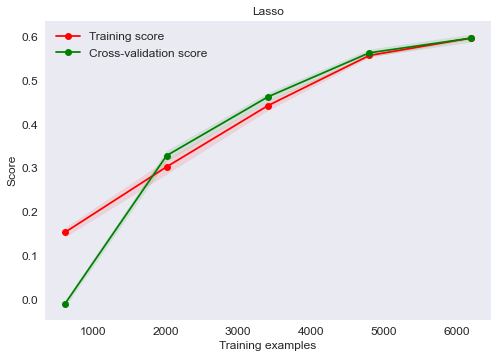

In [71]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  print("************************************************",name,"*****************************************************")
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,X_new,y,scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,X_new,y,cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

In [72]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [73]:
models_result

NAME  Cross_Val_Score  R2_score  Mean_squared_error  \
0    ExtraTreesRegressor         0.920619  0.917841            0.645678   
1  RandomForestRegressor         0.899377  0.898206            0.807264   
2       LinearRegression         0.787798  0.791075            1.726897   
3  DecisionTreeRegressor         0.762878  0.769375            1.838314   
4                  Lasso         0.596164  0.595144            3.268798   

   Mean_Absolute_Error      RMSE  
0             0.590677  0.803541  
1             0.674357  0.898479  
2             0.984496  1.314115  
3             0.973477  1.355845  
4             1.399901  1.807982

Remarks: We are selecting ExtraTreeRegressor as it is giving good R2_score and cross_val_Score of 0.92.

# Hyperparameter tuning our best ML model:

In [74]:
ETree=ExtraTreesRegressor()

In [75]:
params={
 'bootstrap': [False,True],
 'max_depth': [None,1,2,3],
 'min_samples_leaf': [1,2,3,4],
 'min_samples_split': [2,3,4],
 'n_estimators':[100,200,500]
}

Remarks: Listing down the chosen parameters above after selecting ExtraTreeRegressor as our best model.

In [76]:
Grid=GridSearchCV(estimator=ETree,param_grid=params,scoring='r2',n_jobs=-1,cv=kf)

Remarks: Using the Grid Search CV method for hyperparameter tuning of the best model.

In [77]:
Grid.fit(X_new,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

emarks: We have trained the Grid Search CV with the list of parameters we think it should check for best possible outcomes.

In [78]:
Grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

Remarks: In the above cell, the Grid Search CV has provided the best parameters list out of all the combinations it used to train the model.

In [79]:
Grid.best_score_

0.9219241749260506

Remarks: After successfully incorporating the HyperParameter Tuning on the final Model, we have received the accuracy score of 92.19%.

In [80]:
Xtra=ExtraTreesRegressor(bootstrap= False,
 max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 500)

# Final Model Learning curve:

MODEL PERFORMANCE CURVE


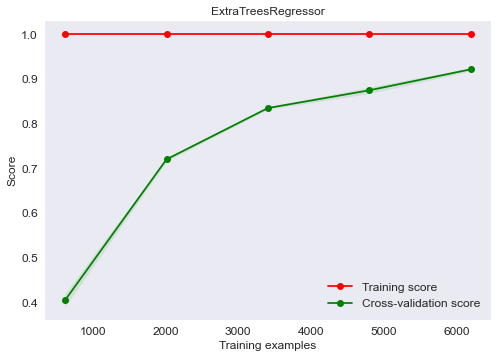

In [81]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(Xtra,X_new,y,cv=kf,scoring='r2',title='ExtraTreesRegressor',text_fontsize='large')
plt.show()

In [82]:
Xtra.fit(X_train,y_train)
Y_Pred=Xtra.predict(X_test)

# Final Model Metrics:

In [84]:
print("Mean Squared Error: ",mean_squared_error(y_test,Y_Pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,Y_Pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,Y_Pred)))
print("R2 Score: ",r2_score(y_test,Y_Pred))

Mean Squared Error:  0.636146165108245
Mean Absolute Error:  0.5889271810711615
RMSE:  0.7975877162470878
R2 Score:  0.9191051885059256


# Saving the model:

In [85]:
joblib.dump(Grid,"Temp_prediction_model.obj")

['Temp_prediction_model.obj']

# Loading the model:

In [86]:
model=joblib.load('Temp_prediction_model.obj')

In [87]:
model.predict(X_test)

array([[28.3, 20.3],
       [35.9, 27.5],
       [25.3, 21.2],
       ...,
       [32.3, 25. ],
       [26.8, 22.1],
       [29.1, 22.5]])

# Conclusion:

1. In this dataset, we were asked to predict two target labels related to temperature.


2. We analyzed the dataset firstly and then we performed EDA to understand the effect of features on our target label.


3. We have performed all the steps of data science life cycle in this project i.e., data pre-processing, data cleaning, Feature Engineering, Feature selection, Feature Transformation and then Model Building.


4. We performed model buildling using many models and we found that ExtraTreeRegressor was giving good matrix so we selected this model and performed hyperparameter tuning to increase the accuracy. At the end, we have build a model with 92.19 % accuracy.


5. Finally, we saved the model for future prediction.